In [1]:
import numpy as np

In [2]:
# 读取MNIST
x = np.load('datasets/MNIST/train_imgs.npy')
y = np.load('datasets/MNIST/test_imgs.npy')
x_label = np.load('datasets/MNIST/train_label.npy')
y_label = np.load('datasets/MNIST/test_label.npy')

In [3]:
mnistx = x
mnisty = x_label

In [4]:
test = y

In [5]:
vector = np.ones(28)

In [41]:
# 示例数据
A = mnistx[0]  # 随机生成 28x28 的矩阵
x = np.ones(28)   # 随机生成 28x1 的向量

# 初始化结果向量
y = np.zeros((28, 1))
list1 = []
# 按列分解计算
for j in range(28):
    y = y + A[:, j:j+1] * x[j]  # A[:, j:j+1] 是第 j 列， x[j] 是对应的向量元素
    list1.append(y.flatten())

In [6]:
def calculate_angles(vector_list):
    """
    计算每两个相邻向量的夹角（以弧度为单位）。
    
    参数：
    vector_list: list of numpy arrays - 包含若干向量的列表
    
    返回：
    angles: list of float - 相邻向量的夹角列表（以弧度为单位）
    """
    angles = []
    for i in range(len(vector_list) - 1):
        # 获取相邻的两个向量
        v1 = vector_list[i]
        v2 = vector_list[i + 1]
        
        # 计算点积和范数
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        
        # 防止除以零的情况
        if norm_v1 == 0 or norm_v2 == 0:
            angle = np.float64(0.0)
        else:
            # 计算余弦值并转换为夹角
            cos_theta = dot_product / (norm_v1 * norm_v2)
            # 限制 cos_theta 的范围以避免数值误差
            cos_theta = np.clip(cos_theta, -1.0, 1.0)
            angle = np.arccos(cos_theta)
        
        angles.append(angle)
    
    return angles


In [7]:
x = np.ones(28)   # 随机生成 28x1 的向量
list2 = []
for i in range(len(mnistx)):
    A = mnistx[i]  # 随机生成 28x28 的矩阵
    # 初始化结果向量
    y = np.zeros((28, 1))
    list1 = []
    # 按列分解计算
    for j in range(28):
        y = y + A[:, j:j+1] * x[j]  # A[:, j:j+1] 是第 j 列， x[j] 是对应的向量元素
        list1.append(y.flatten())
    list2.append(list1)

In [8]:
list3 = []
for i in range(len(list2)):
    angles = calculate_angles(list2[i])
    list3.append(angles)

In [9]:
minsty = x_label

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 假设 list3 和 minsty 已经定义
# 示例数据
# list3 = [...]  # 数据列表
# minsty = [...]  # 标签列表，假设与 list3 一一对应

# 每种标签选择50个数据
label_data = defaultdict(list)
for data, label in zip(list3, minsty):
    if len(label_data[label]) < 50:  # 每个标签只取50个
        label_data[label].append(data)

# 创建包含10个子图的图形
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2行5列，适合10个子图
fig.suptitle("Sampled Data for Each Label", fontsize=20)

# 将axes展平成1维数组，便于通过索引访问每个子图
axes = axes.flatten()

# 遍历标签，绘制每个标签对应的数据
for label, ax in enumerate(axes):
    if label in label_data:  # 确保标签存在
        for idx, item in enumerate(label_data[label]):
            ax.plot(item, color="blue")  # 绘制每个数据，颜色统一为蓝色
        ax.set_title(f"Label {label}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")
    else:
        ax.set_visible(False)  # 如果没有数据，隐藏该子图

# 调整布局并显示图形
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


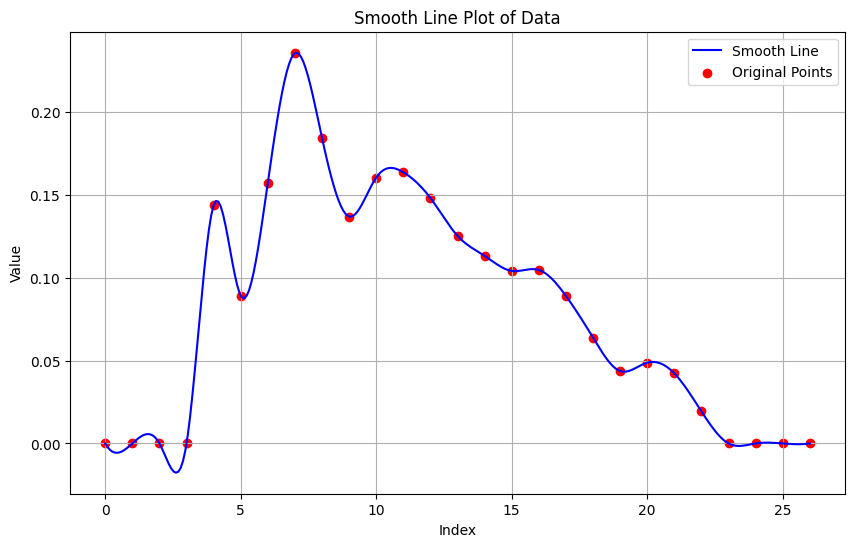

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 数据
data = angles

# x轴的原始点
x = np.arange(len(data))

# 使用 make_interp_spline 进行平滑插值
x_smooth = np.linspace(x.min(), x.max(), 300)  # 生成更多的 x 值以实现平滑效果
smooth_func = make_interp_spline(x, data)      # 创建平滑函数
y_smooth = smooth_func(x_smooth)               # 获取平滑后的 y 值

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label="Smooth Line")
plt.scatter(x, data, color='red', marker='o', label="Original Points")  # 原始数据点
plt.title("Smooth Line Plot of Data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
list3[0]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.14393044221265994),
 np.float64(0.08922753604681272),
 np.float64(0.15760498054000777),
 np.float64(0.23576918254060664),
 np.float64(0.18451137869891326),
 np.float64(0.13703967619447974),
 np.float64(0.1606474969340638),
 np.float64(0.16381311481005886),
 np.float64(0.1482519273007251),
 np.float64(0.12541942073552828),
 np.float64(0.1133205771377108),
 np.float64(0.10421167676234727),
 np.float64(0.10480095760132478),
 np.float64(0.08912841718612262),
 np.float64(0.06394941983121567),
 np.float64(0.04373783534594793),
 np.float64(0.048789327677001955),
 np.float64(0.04234579883224133),
 np.float64(0.01936532345935036),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

In [10]:
list4 = []
for i in range(len(list3)):
    temp = []
    for j in range(len(list3[i])):
        temp.append(list3[i][j].item())
    list4.append(temp)

In [11]:
a = np.array(list4[0])
b = a.reshape(a.shape[0],1)
c = a.T

In [12]:
outrex = np.outer(a,c)
outrex

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.    

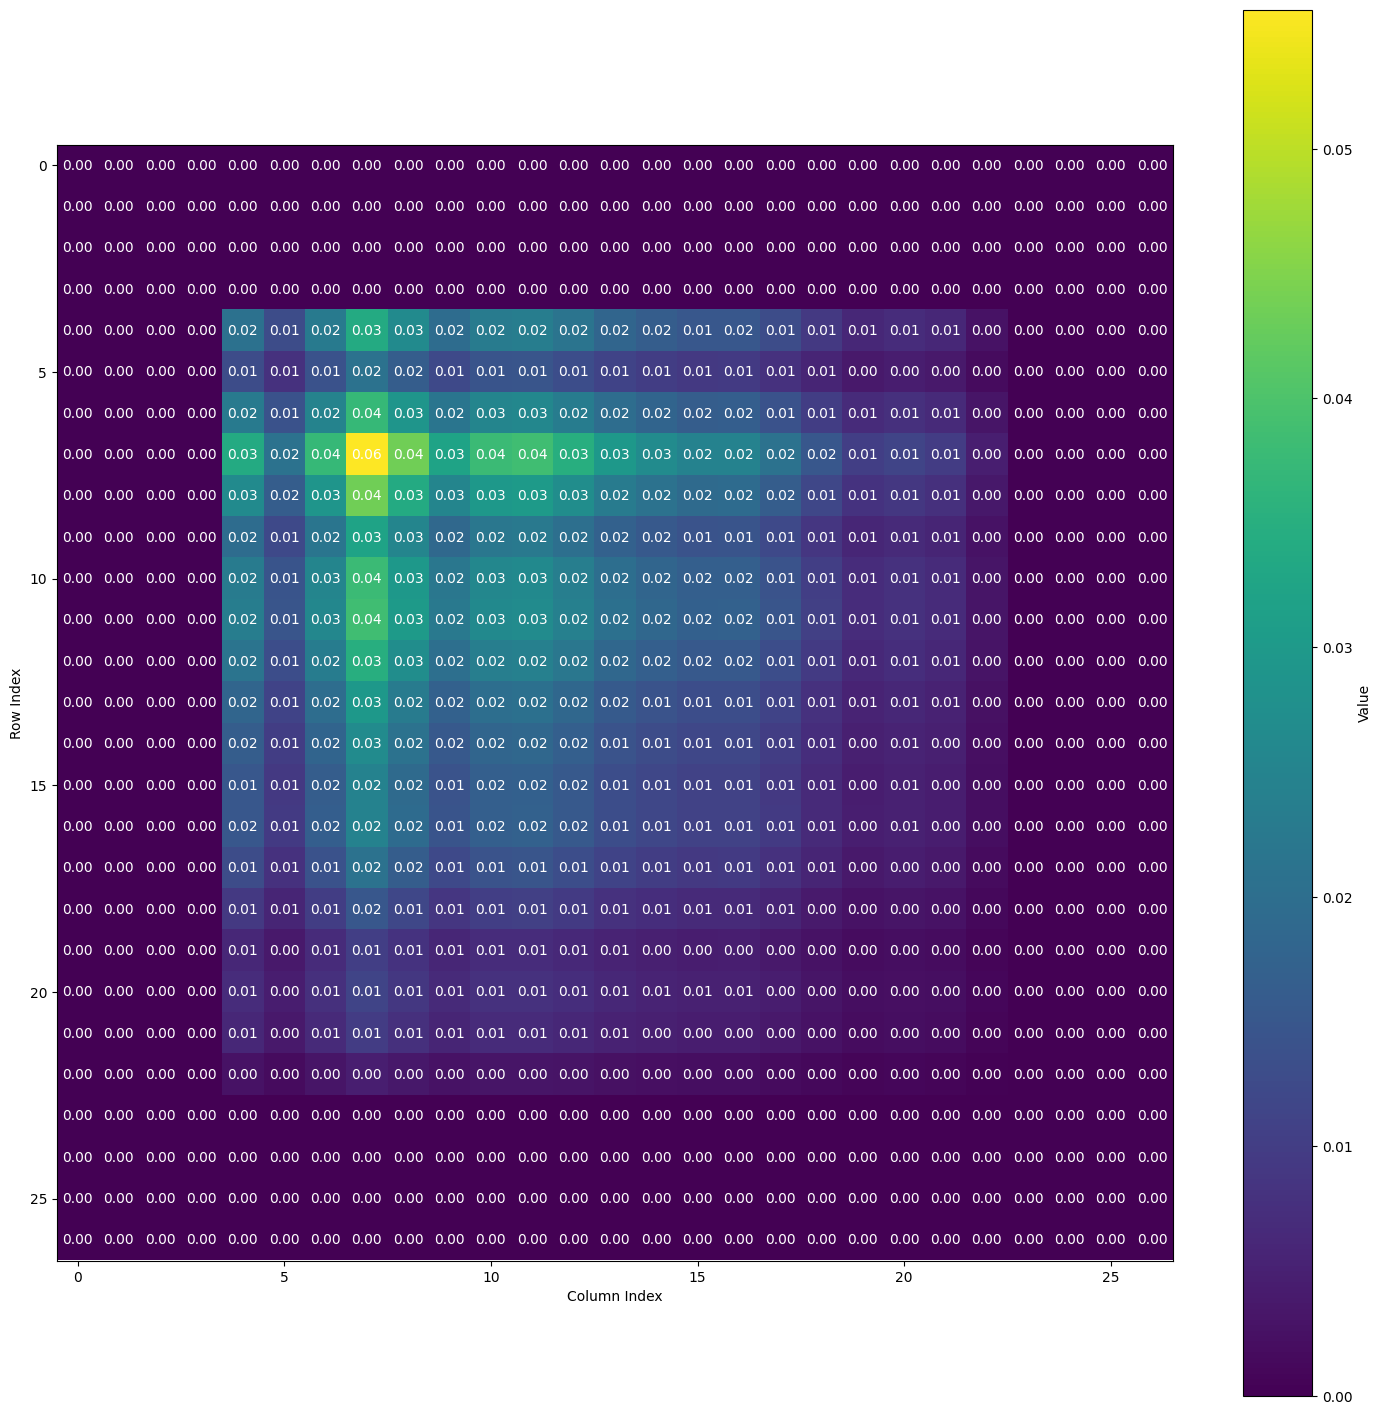

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 示例矩阵：28x28的随机矩阵

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(outrex, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(outrex.shape[0]):
    for j in range(outrex.shape[1]):
        plt.text(j, i, f"{outrex[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('outer_0.png', dpi=600)        
plt.show()


In [105]:
mnisty[0]

np.uint8(5)

In [14]:
a = np.array(list4[1])
c = a.T

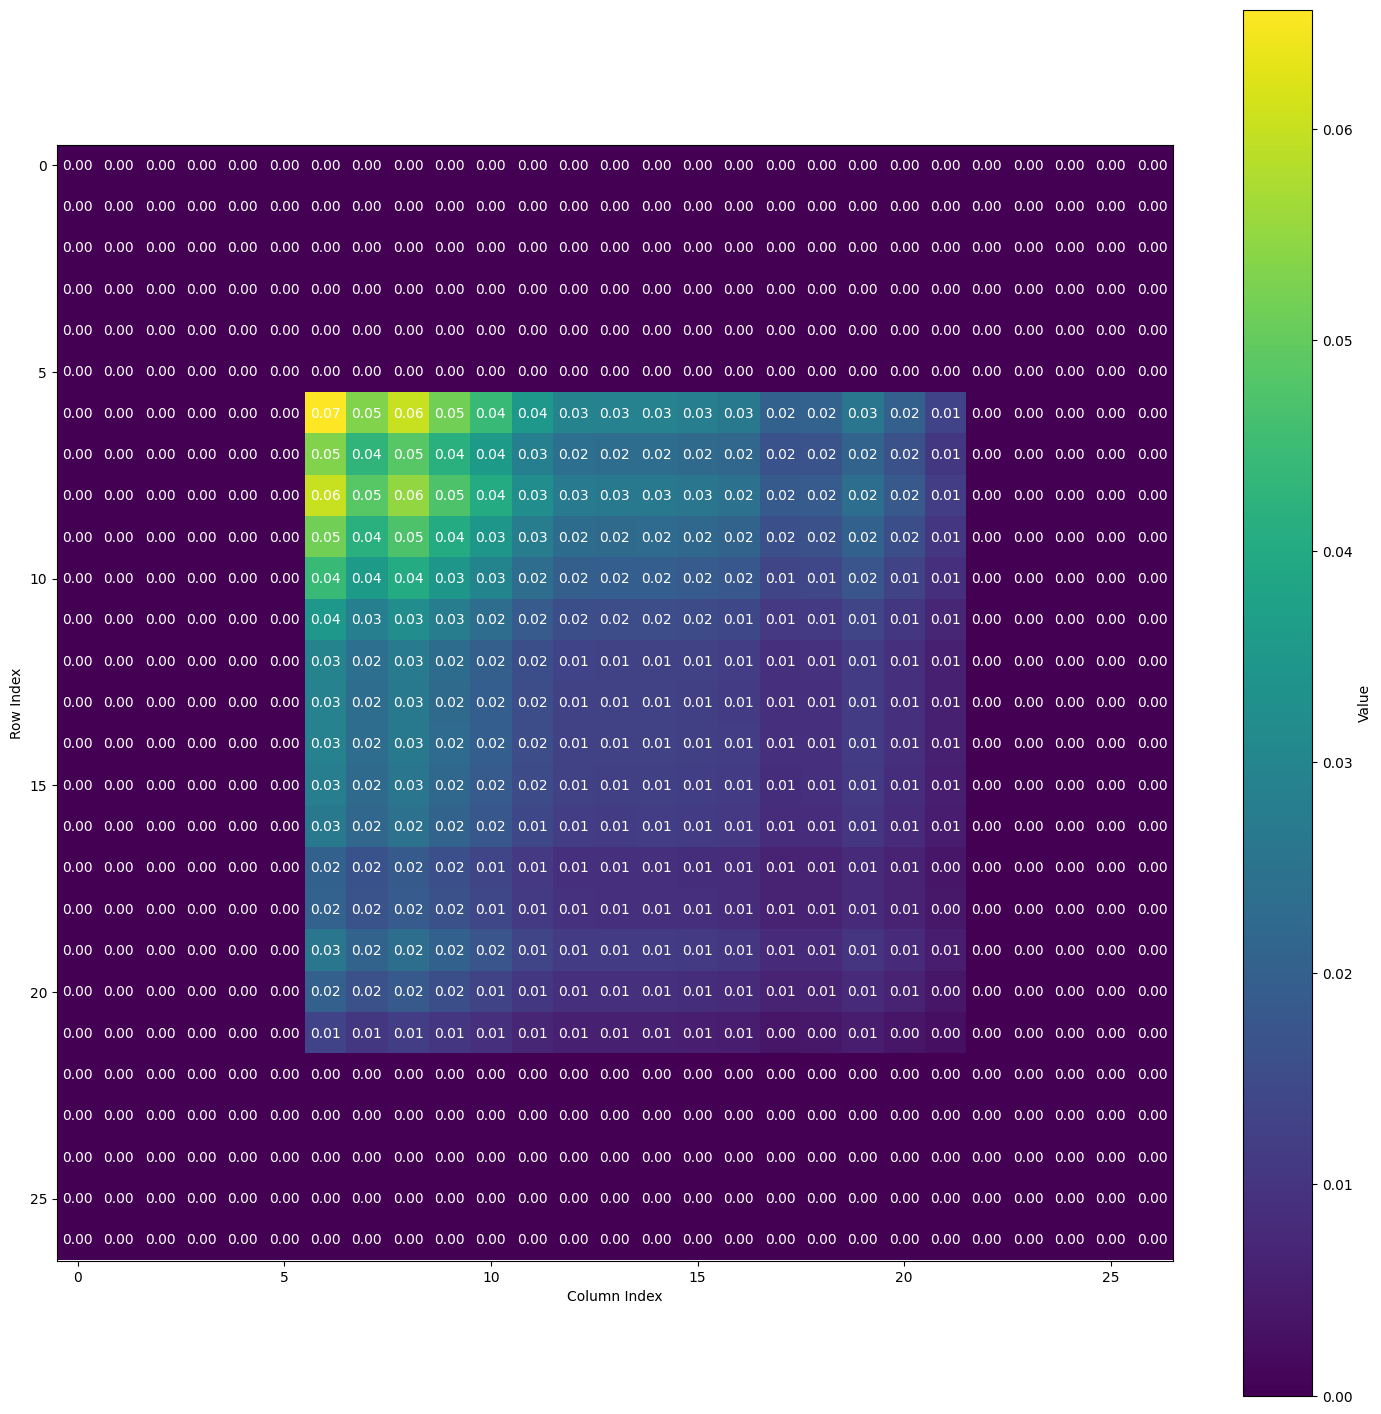

In [15]:
outrex = np.outer(a,c)

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(outrex, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(outrex.shape[0]):
    for j in range(outrex.shape[1]):
        plt.text(j, i, f"{outrex[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('outer_0.png', dpi=600)  
plt.show()

In [111]:
mnisty[1]

np.uint8(0)

In [16]:
x_11 = np.load('mnist处理后的数据/train_11.npy')
y_11 = np.load('mnist处理后的数据/test_11.npy')

In [17]:
mnist_train_outer_1 = []
for i in range(len(x_11)):
    temp = np.outer(x_11[i], x_11[i].T)
    mnist_train_outer_1.append(temp)

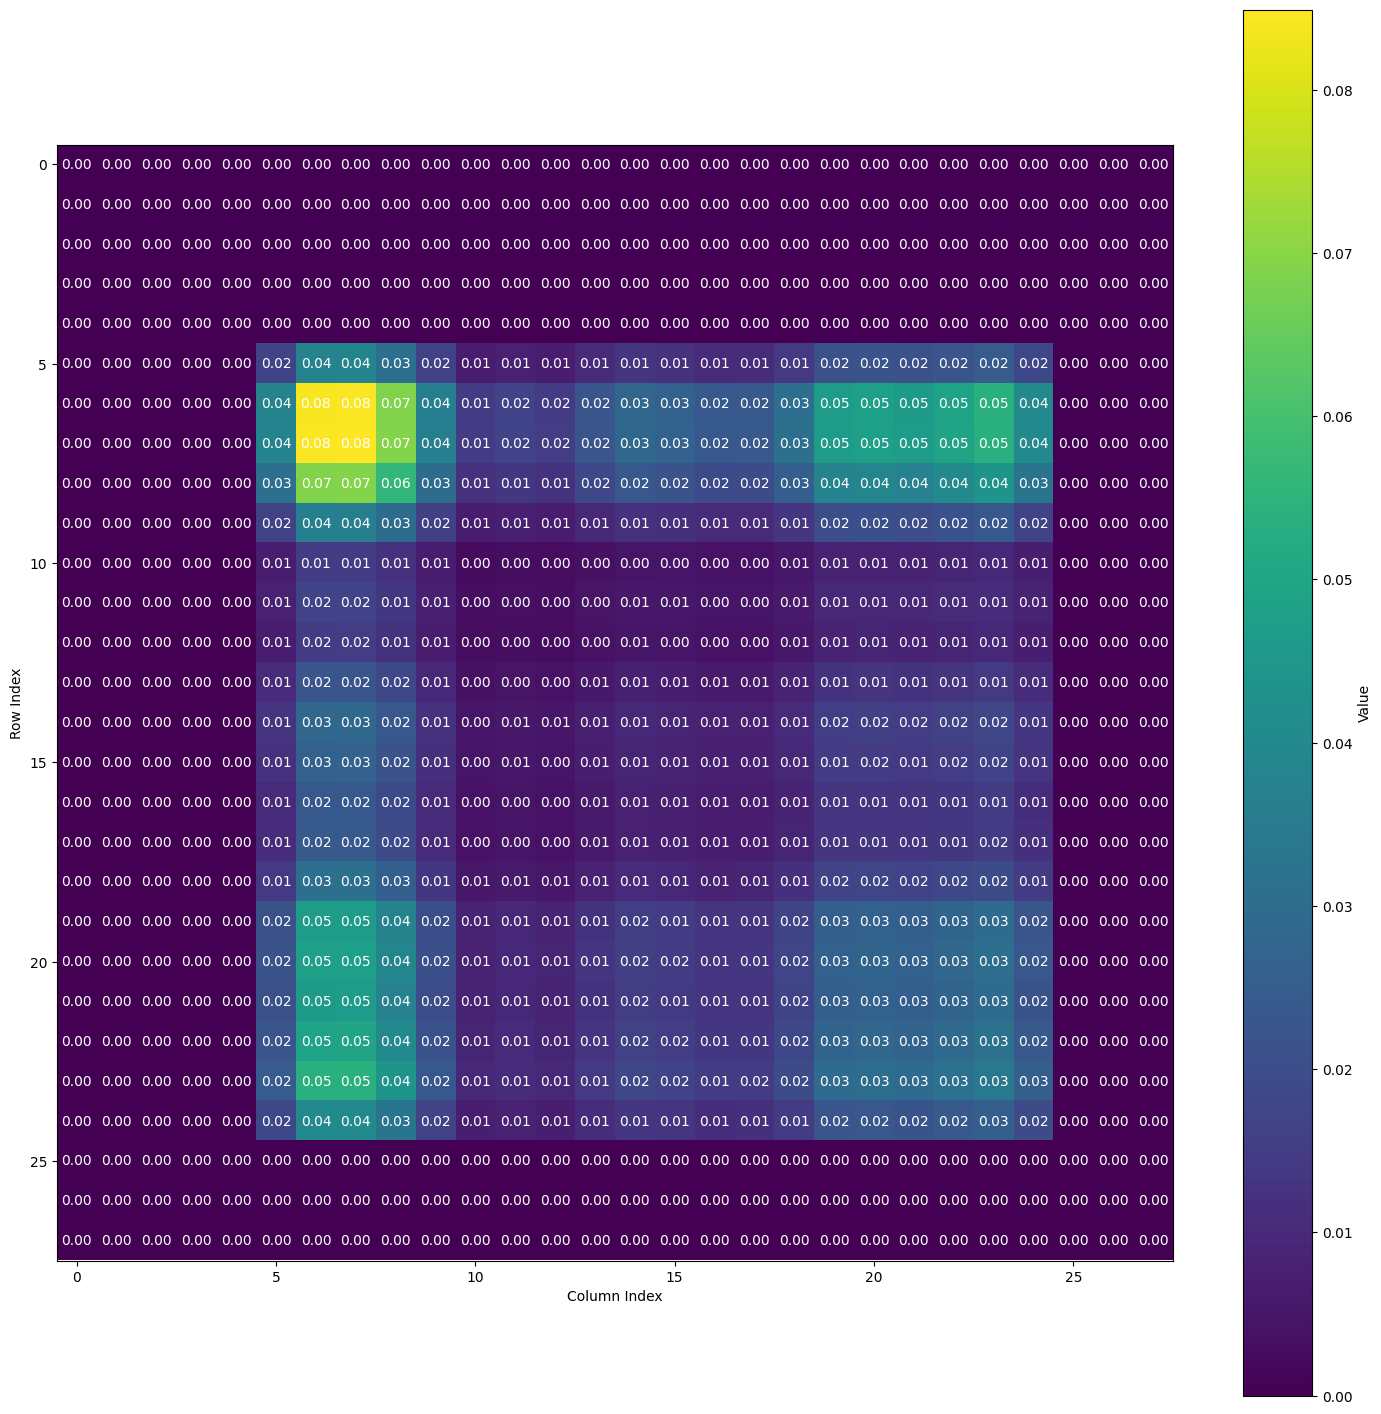

In [19]:
# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(mnist_train_outer_1[0], cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(mnist_train_outer_1[0].shape[0]):
    for j in range(mnist_train_outer_1[0].shape[1]):
        plt.text(j, i, f"{mnist_train_outer_1[0][i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('outer_vector_5.png', dpi=600)  
plt.show()

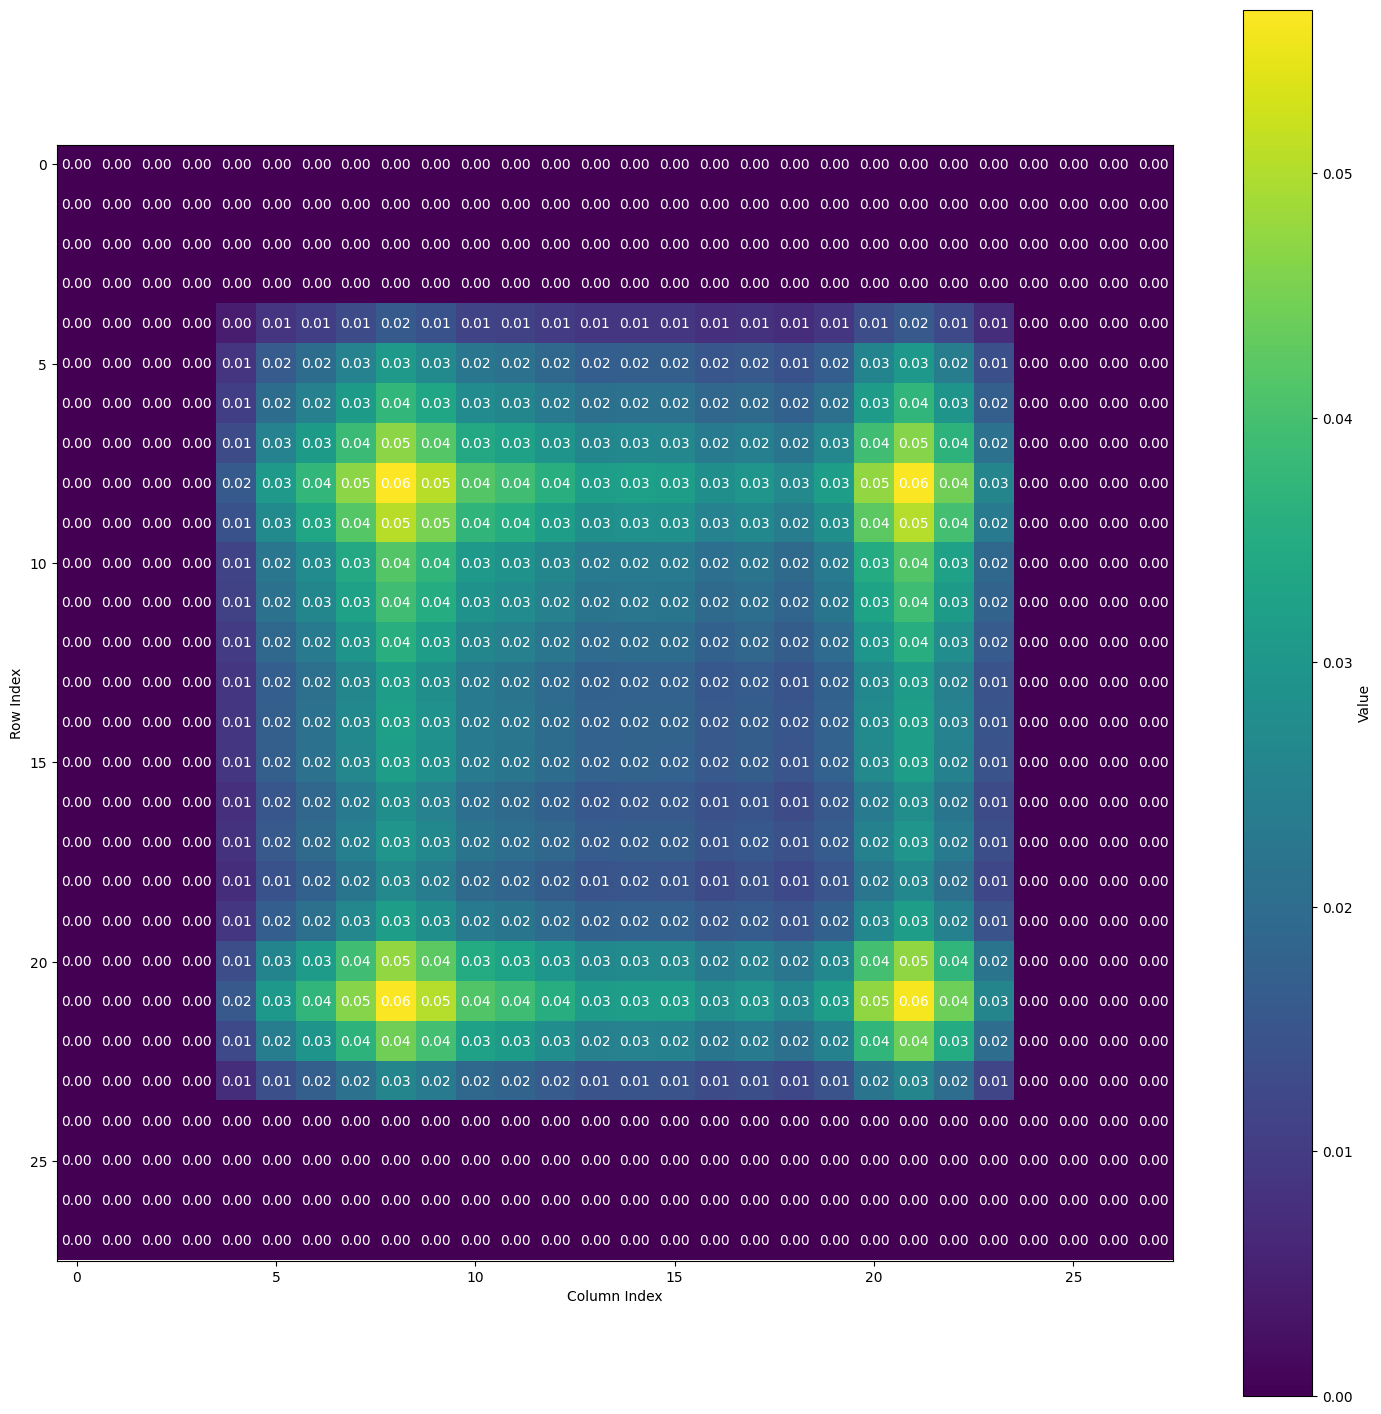

In [20]:
plt.figure(figsize=(18, 18))
plt.imshow(mnist_train_outer_1[1], cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(mnist_train_outer_1[1].shape[0]):
    for j in range(mnist_train_outer_1[1].shape[1]):
        plt.text(j, i, f"{mnist_train_outer_1[1][i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('outer_vector_0.png', dpi=600)  
plt.show()

In [22]:
matric = np.zeros(784).reshape(28, 28)
for i in range(28):
    for j in range(28):
        #temp = np.array(x_11[0][i].T)
        matric[i][j] = np.dot(x_11[0][i], x_11[0].T[j])

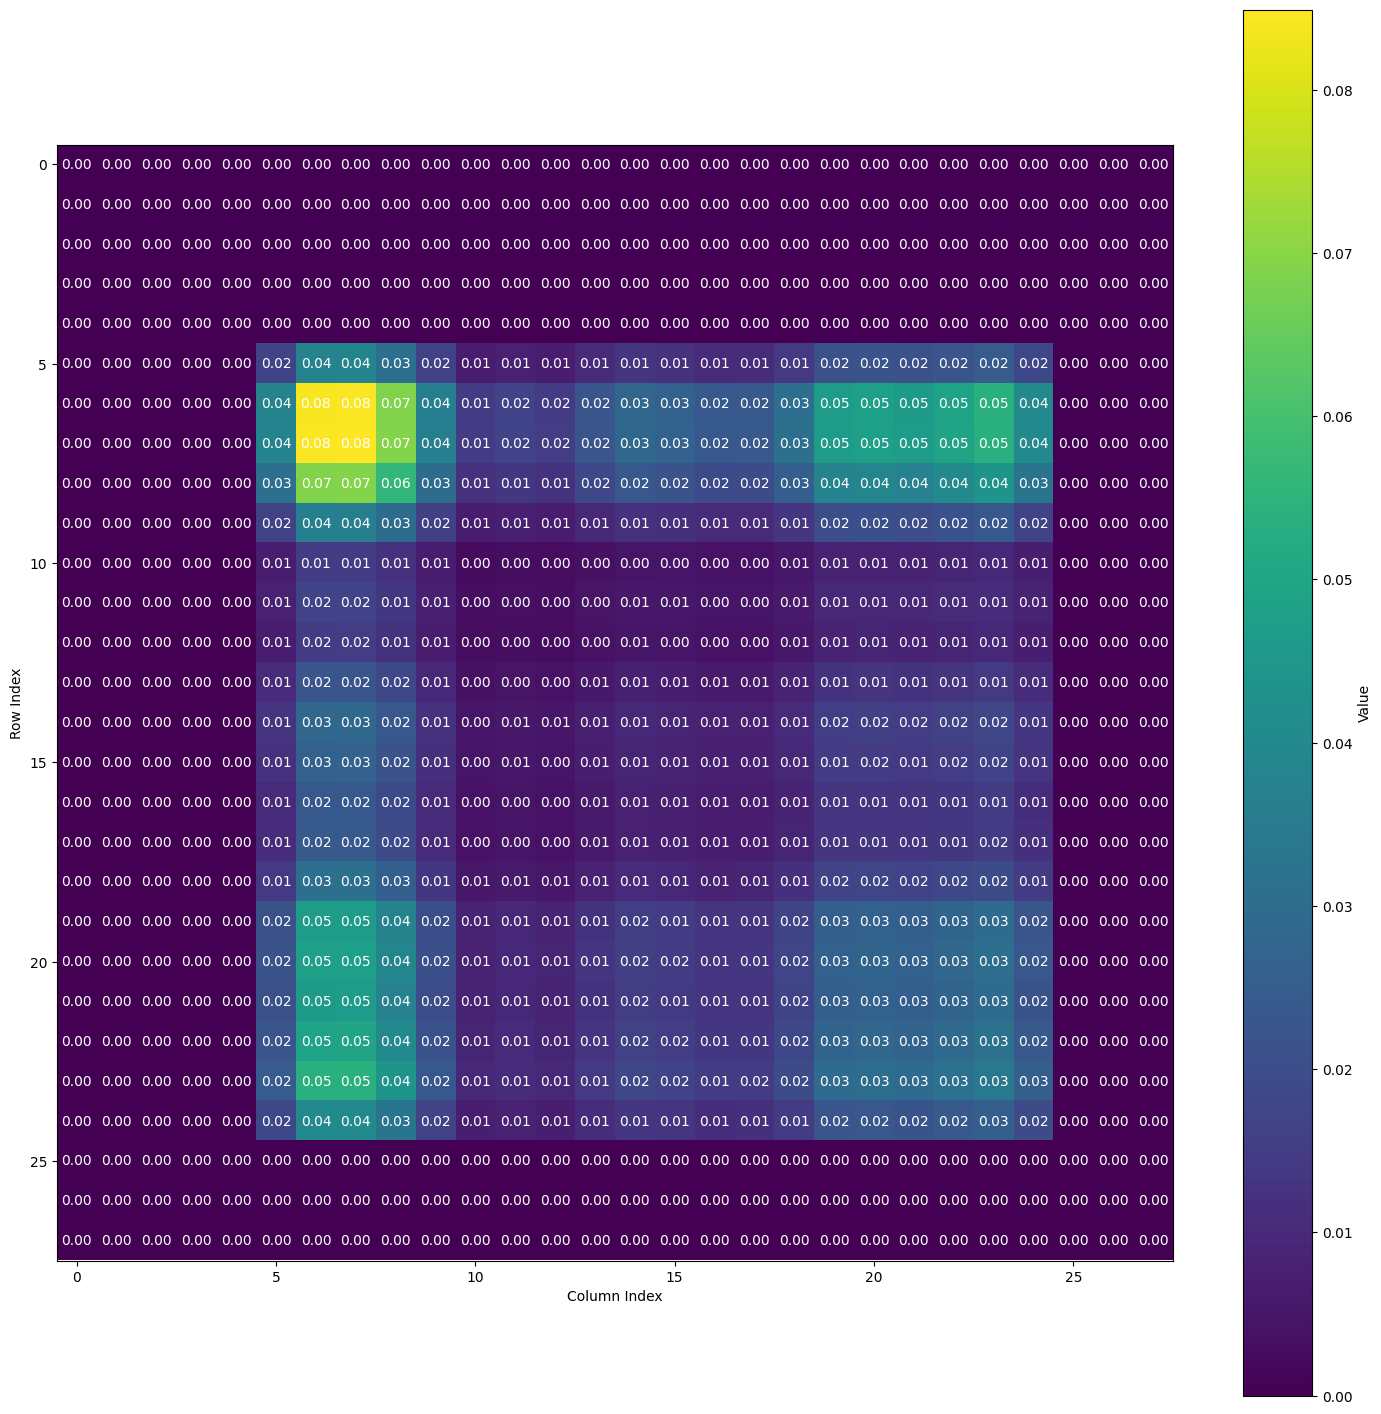

In [23]:
# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('dot_vector_5.png', dpi=600)  
plt.show()

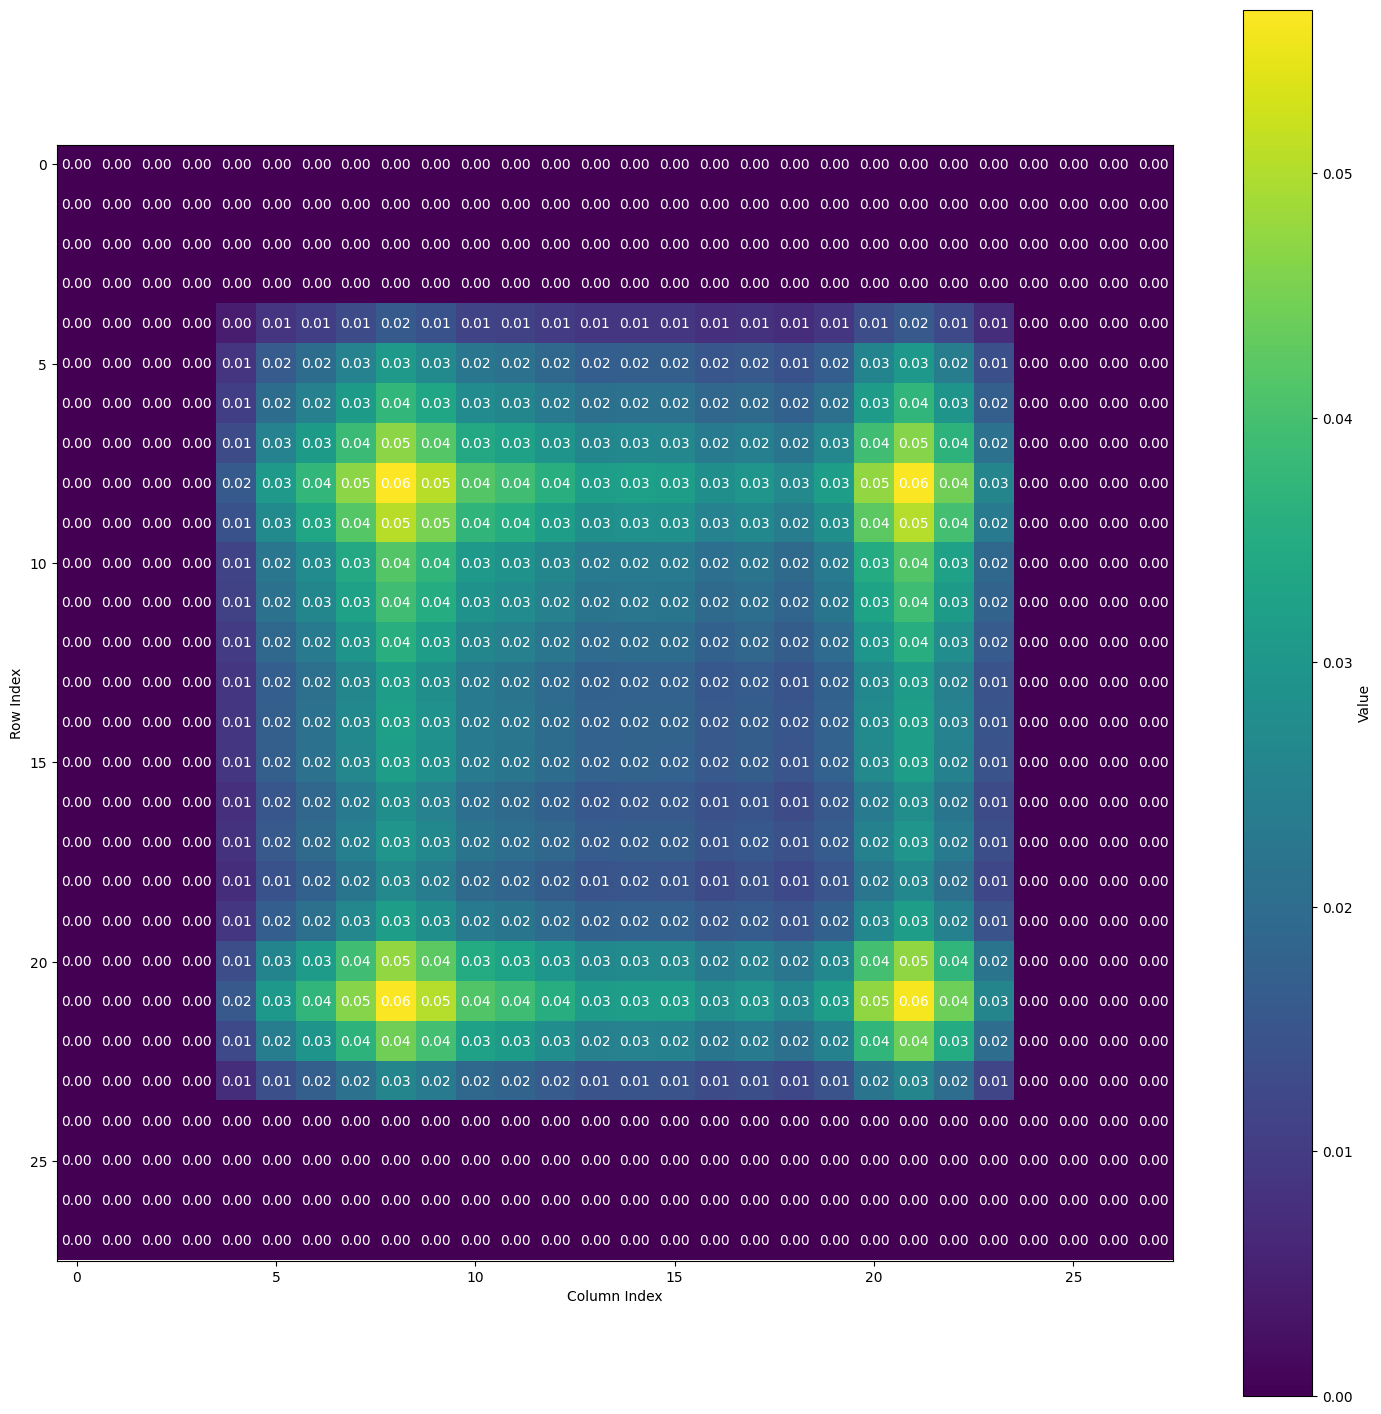

In [24]:
matric = np.zeros(784).reshape(28, 28)
for i in range(28):
    for j in range(28):
        #temp = np.array(x_11[0][i].T)
        matric[i][j] = np.dot(x_11[1][i], x_11[1].T[j])
# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('dot_vector_0.png', dpi=600)  
plt.show()

In [25]:
def unique_al(num1, num2):
    if num1 + num2 > 1:
        return num1 + num2 - 1
    else: 
        return num1 + num2

In [26]:
matric = np.zeros(729).reshape(27, 27)
for i in range(27):
    for j in range(27):
        temp = np.array(list4[0]).T
        matric[i][j] = unique_al(list4[0][i], temp[j])

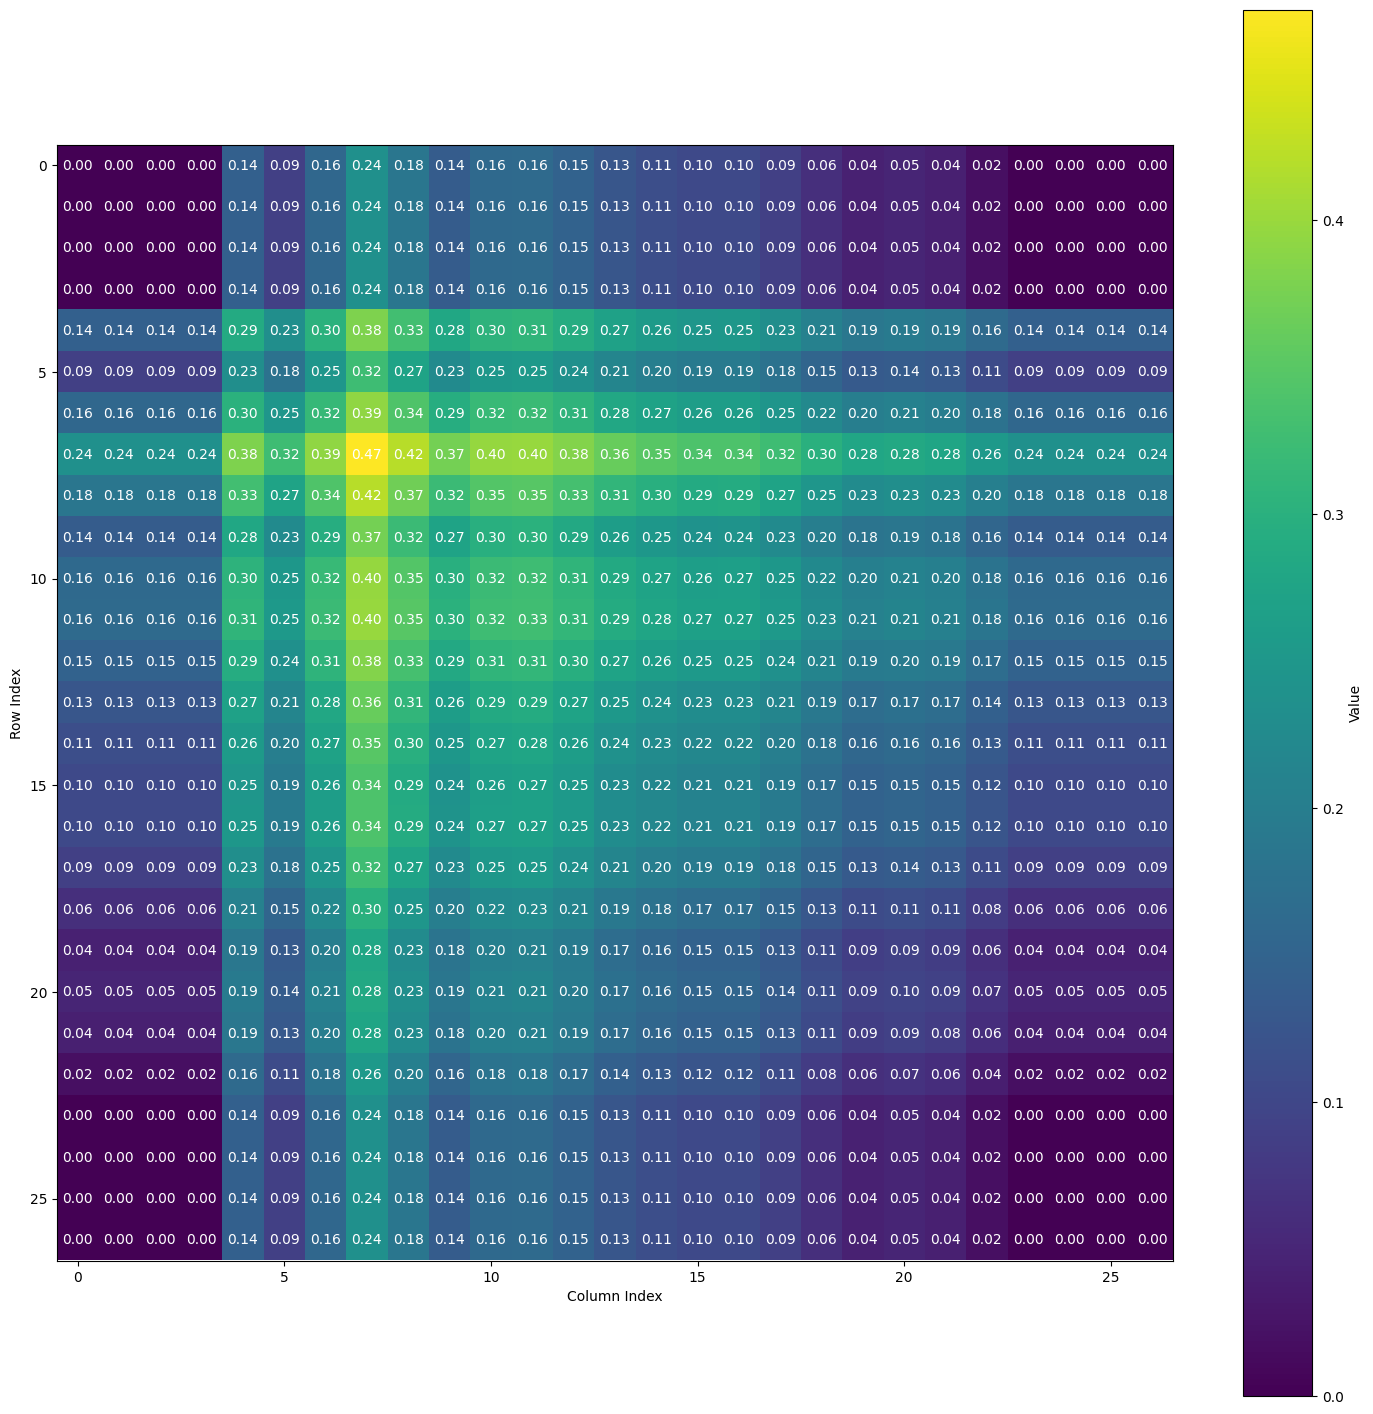

In [27]:
matric = np.zeros(729).reshape(27, 27)
for i in range(27):
    for j in range(27):
        temp = np.array(list4[0]).T
        matric[i][j] = unique_al(list4[0][i], temp[j])
# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('360_5.png', dpi=600)  
plt.show()

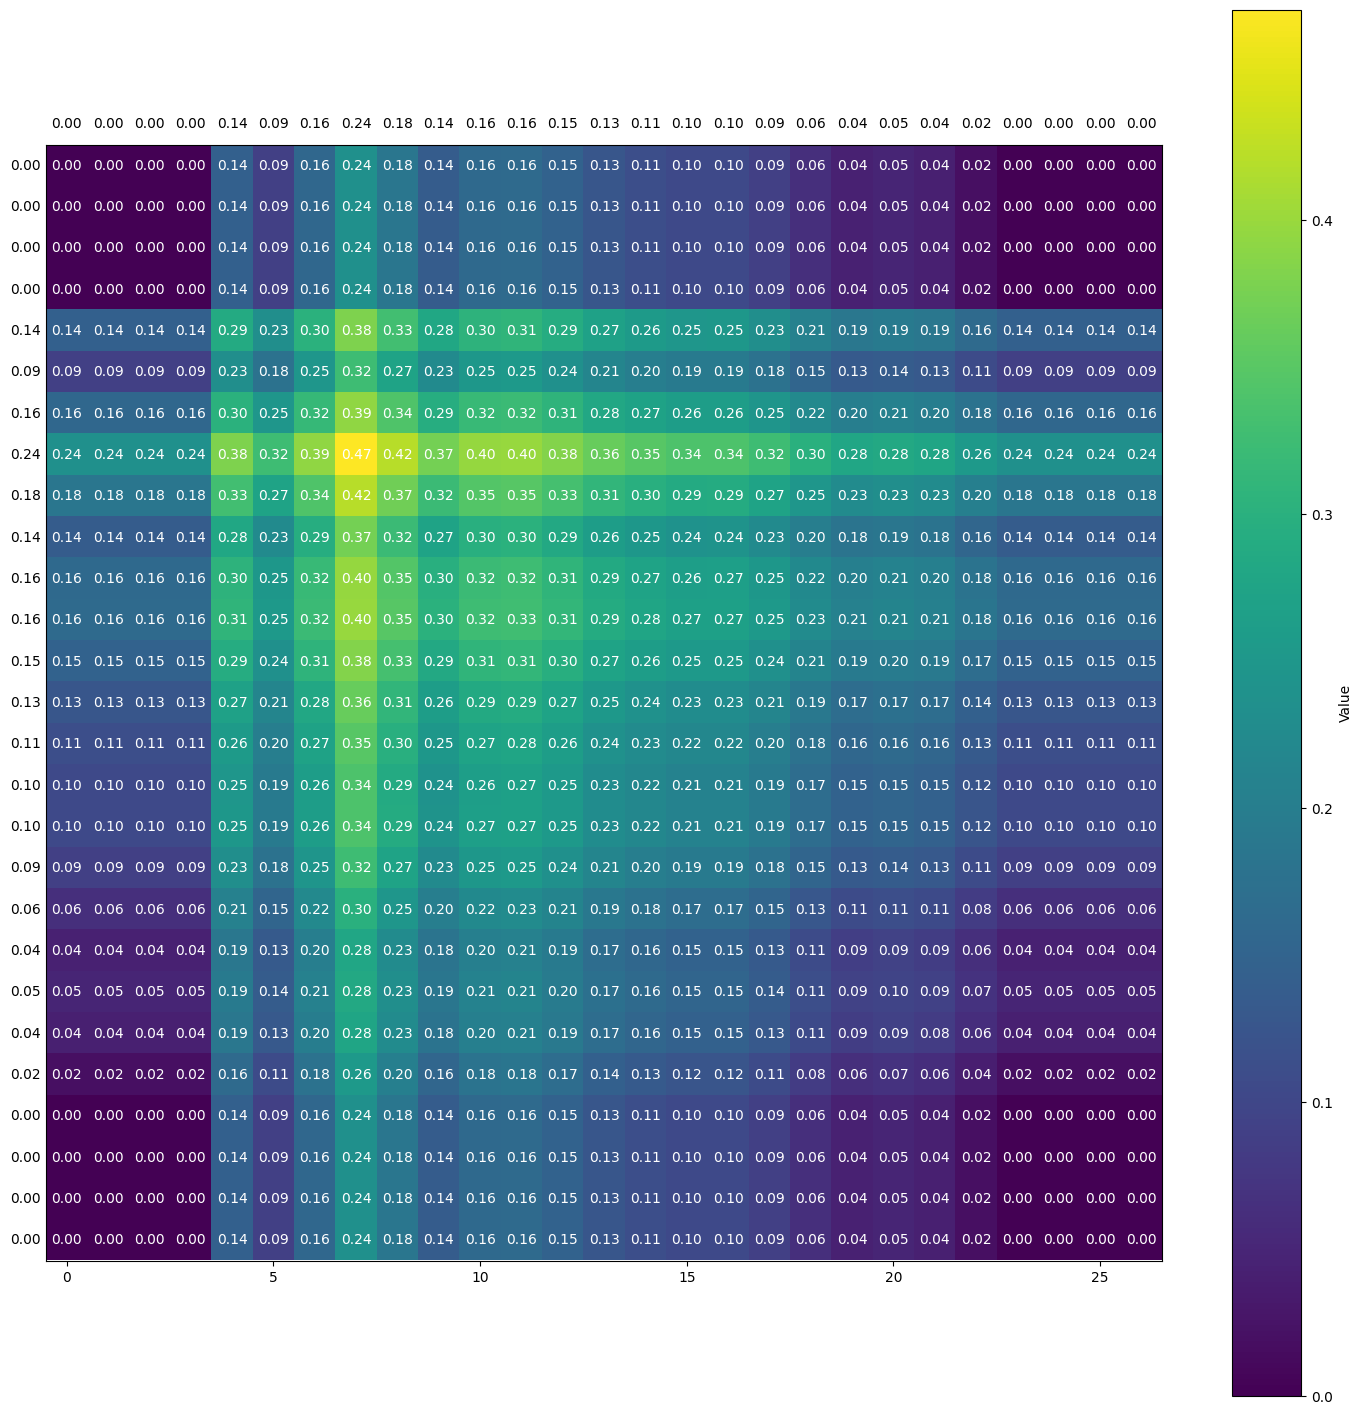

In [32]:
# 假设 unique_al 和 list4 已经定义并提供了数据
matric = np.zeros(729).reshape(27, 27)
for i in range(27):
    for j in range(27):
        temp = np.array(list4[0]).T
        matric[i][j] = unique_al(list4[0][i], temp[j])

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值

plt.gca().axes.get_yaxis().set_visible(False)

# 添加列标题显示
for j in range(matric.shape[1]):
    plt.text(j, -1, f"{list4[0][j]:.2f}", ha='center', va='center', color="black", fontsize=10)

for i in range(matric.shape[0]):
    plt.text(-1, i, f"{list4[0][i]:.2f}", ha='center', va='center', color="black", fontsize=10)

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('360_5.png', dpi=600) 
plt.show()


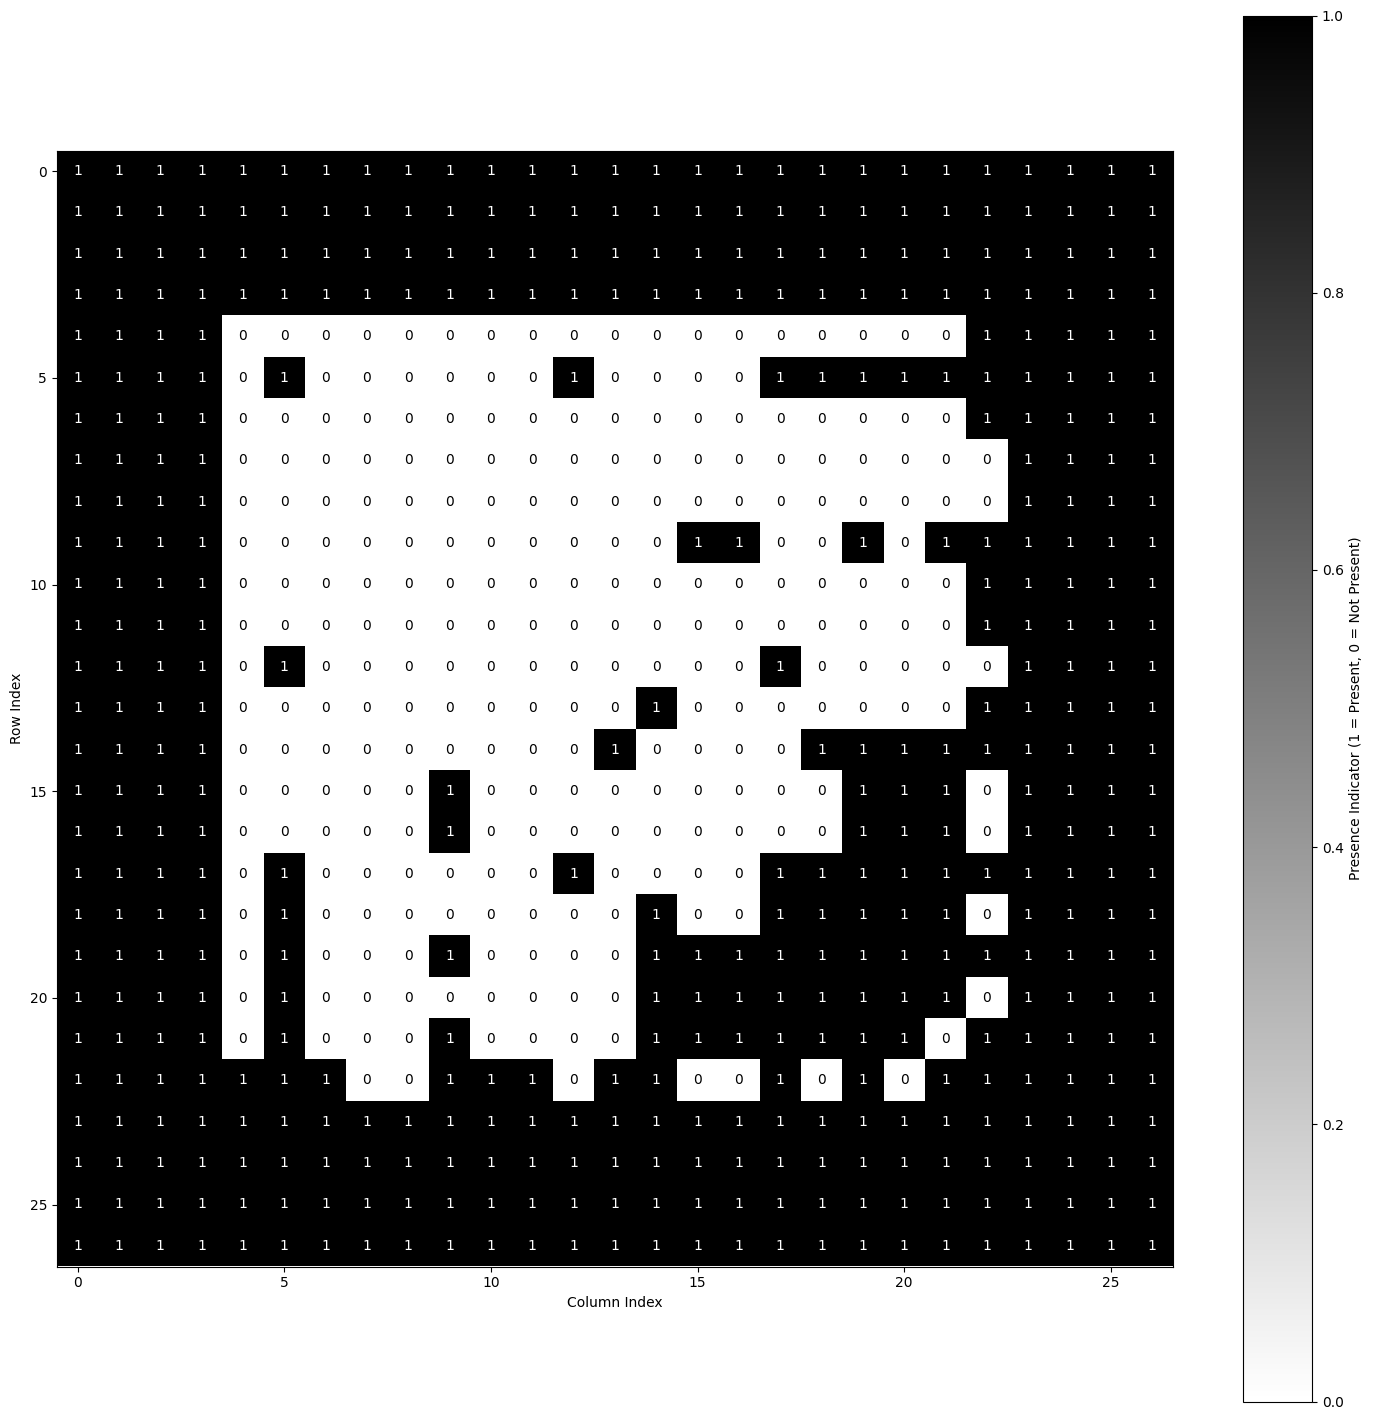

In [33]:
# 创建用于存储结果的矩阵
new_matrix = np.zeros_like(matric)

# 生成 list4 中只看小数点后两位的值集合
rounded_list4_values = {round(value, 2) for value in list4[0]}

# 检查 matric 中的值是否在 list4 的值集合中
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        if round(matric[i, j], 2) in rounded_list4_values:
            new_matrix[i, j] = 1  # 匹配成功则置 1

# 可视化新矩阵
plt.figure(figsize=(18, 18))
plt.imshow(new_matrix, cmap='binary', interpolation='nearest')
plt.colorbar(label="Presence Indicator (1 = Present, 0 = Not Present)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加矩阵内数值显示
for i in range(new_matrix.shape[0]):
    for j in range(new_matrix.shape[1]):
        plt.text(j, i, f"{int(new_matrix[i, j])}", ha='center', va='center', color="white" if new_matrix[i, j] == 1 else "black")

plt.savefig('360_01_5.png', dpi=600) 
plt.show()


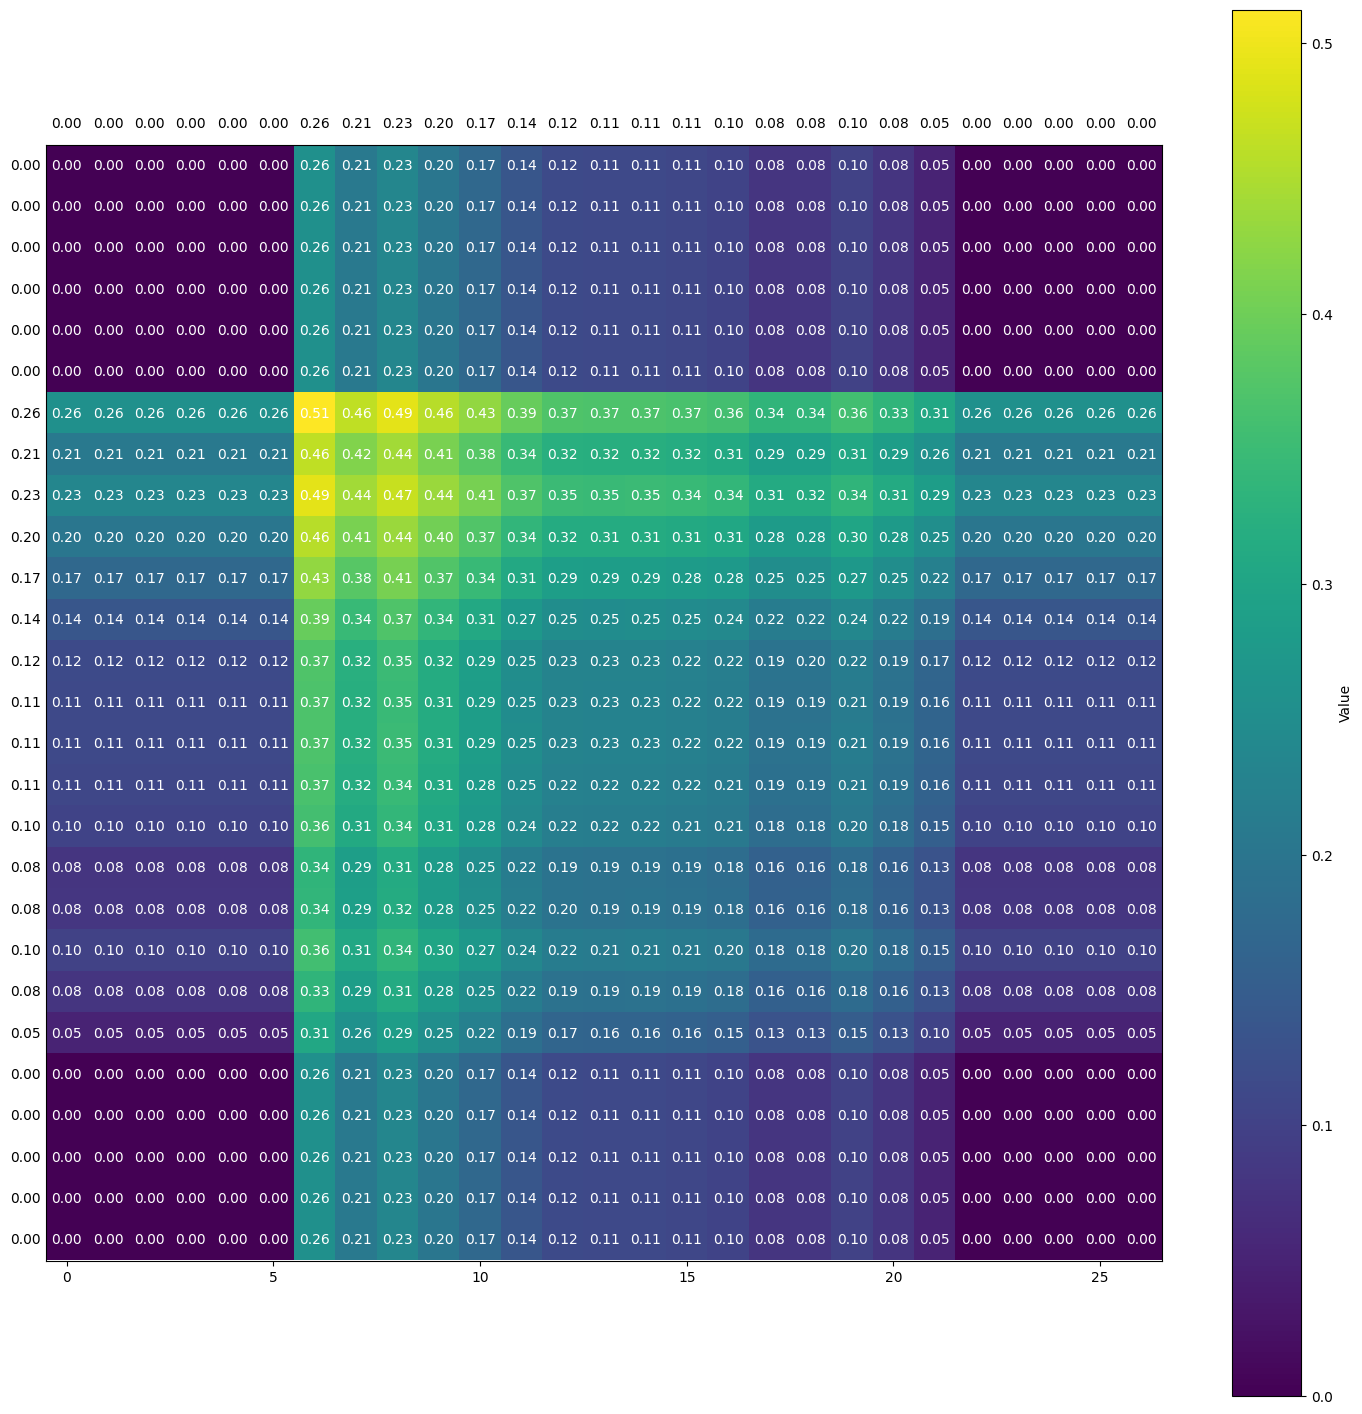

In [34]:
# 假设 unique_al 和 list4 已经定义并提供了数据
matric = np.zeros(729).reshape(27, 27)
for i in range(27):
    for j in range(27):
        temp = np.array(list4[1]).T
        matric[i][j] = unique_al(list4[1][i], temp[j])

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值

plt.gca().axes.get_yaxis().set_visible(False)

# 添加列标题显示
for j in range(matric.shape[1]):
    plt.text(j, -1, f"{list4[1][j]:.2f}", ha='center', va='center', color="black", fontsize=10)

for i in range(matric.shape[0]):
    plt.text(-1, i, f"{list4[1][i]:.2f}", ha='center', va='center', color="black", fontsize=10)

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('360_0.png', dpi=600) 
plt.show()

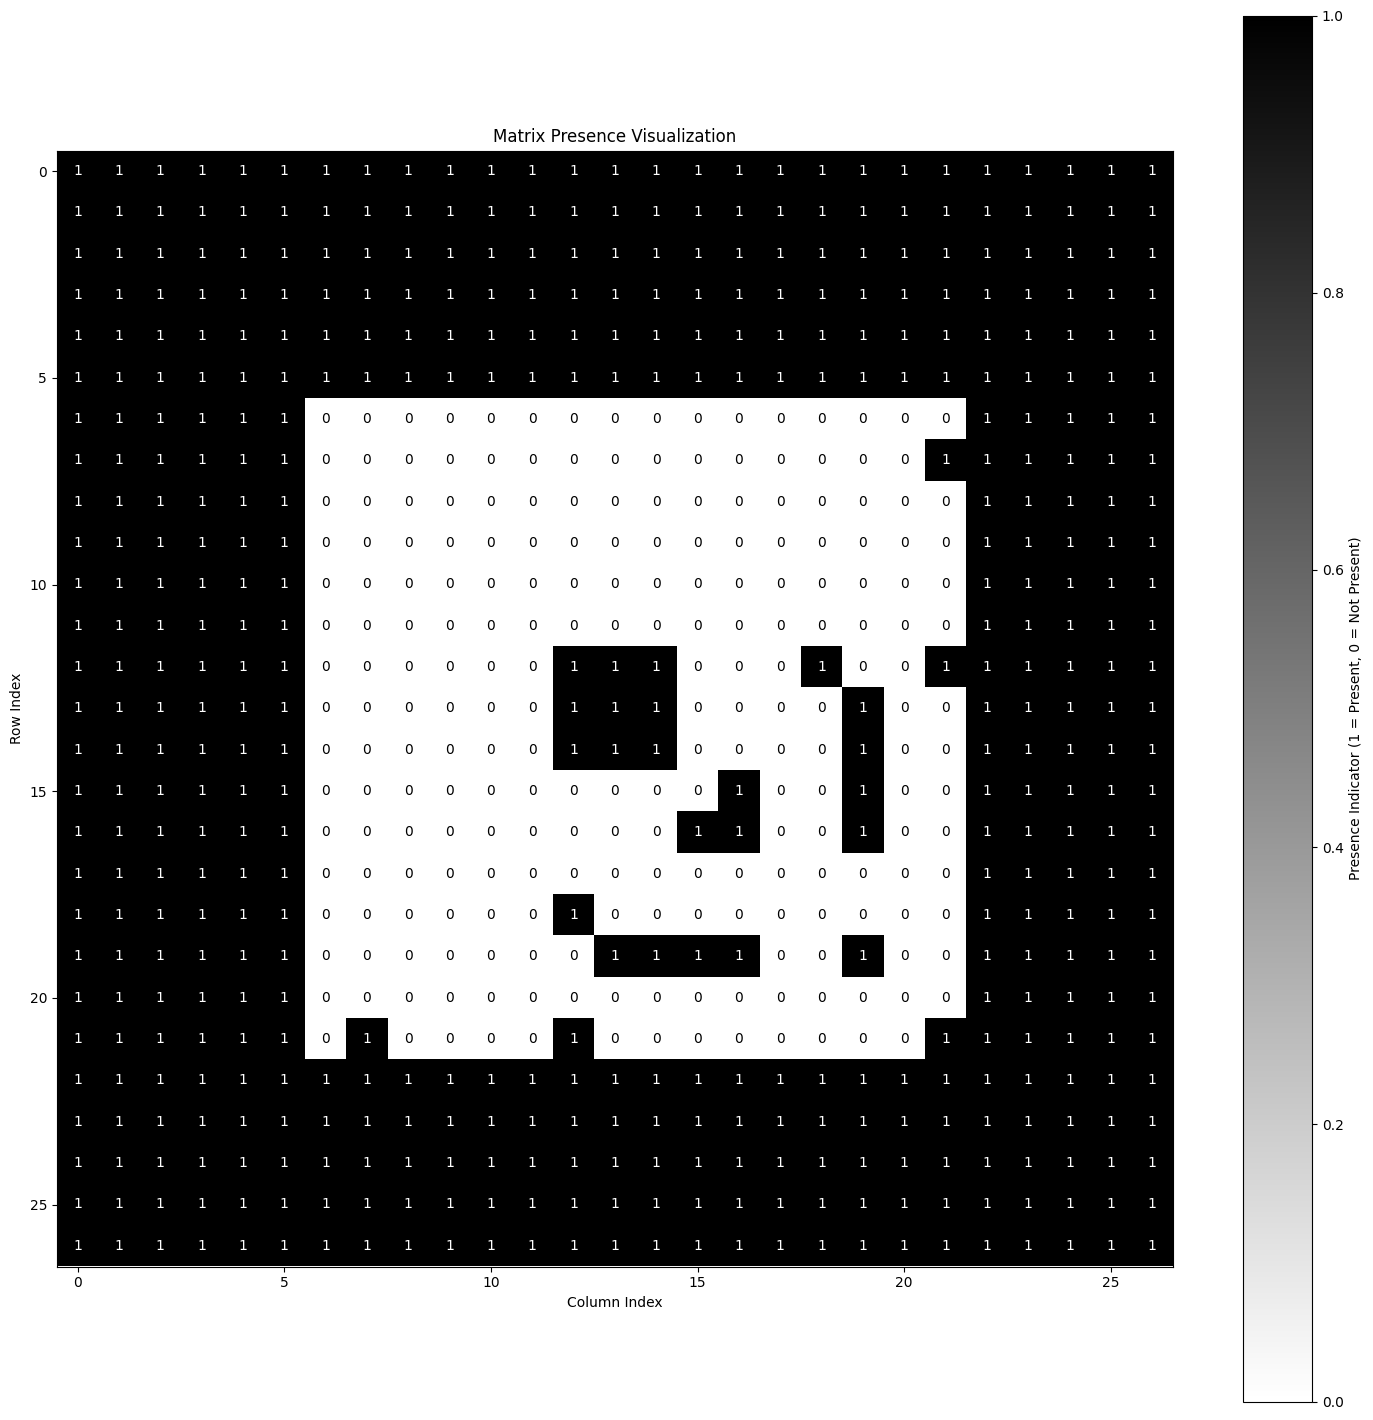

In [35]:
# 创建用于存储结果的矩阵
new_matrix = np.zeros_like(matric)

# 生成 list4 中只看小数点后两位的值集合
rounded_list4_values = {round(value, 2) for value in list4[1]}

# 检查 matric 中的值是否在 list4 的值集合中
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        if round(matric[i, j], 2) in rounded_list4_values:
            new_matrix[i, j] = 1  # 匹配成功则置 1

# 可视化新矩阵
plt.figure(figsize=(18, 18))
plt.imshow(new_matrix, cmap='binary', interpolation='nearest')
plt.colorbar(label="Presence Indicator (1 = Present, 0 = Not Present)")
plt.title("Matrix Presence Visualization")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加矩阵内数值显示
for i in range(new_matrix.shape[0]):
    for j in range(new_matrix.shape[1]):
        plt.text(j, i, f"{int(new_matrix[i, j])}", ha='center', va='center', color="white" if new_matrix[i, j] == 1 else "black")

plt.savefig('360_01_0.png', dpi=600) 
plt.show()

In [36]:
# 读取cifar
x = np.load('datasets/cifar-gray/train_origin.npy')

In [37]:
cifarx = x

In [41]:
x = np.ones(32)   # 随机生成 28x1 的向量
list2 = []
for i in range(len(cifarx)):
    A = cifarx[i]  # 随机生成 28x28 的矩阵
    # 初始化结果向量
    y = np.zeros((32, 1))
    list1 = []
    # 按列分解计算
    for j in range(32):
        y = y + A[:, j:j+1] * x[j]  # A[:, j:j+1] 是第 j 列， x[j] 是对应的向量元素
        list1.append(y.flatten())
    list2.append(list1)

In [42]:
list3 = []
for i in range(len(list2)):
    angles = calculate_angles(list2[i])
    list3.append(angles)

In [43]:
list4 = []
for i in range(len(list3)):
    temp = []
    for j in range(len(list3[i])):
        temp.append(list3[i][j].item())
    list4.append(temp)

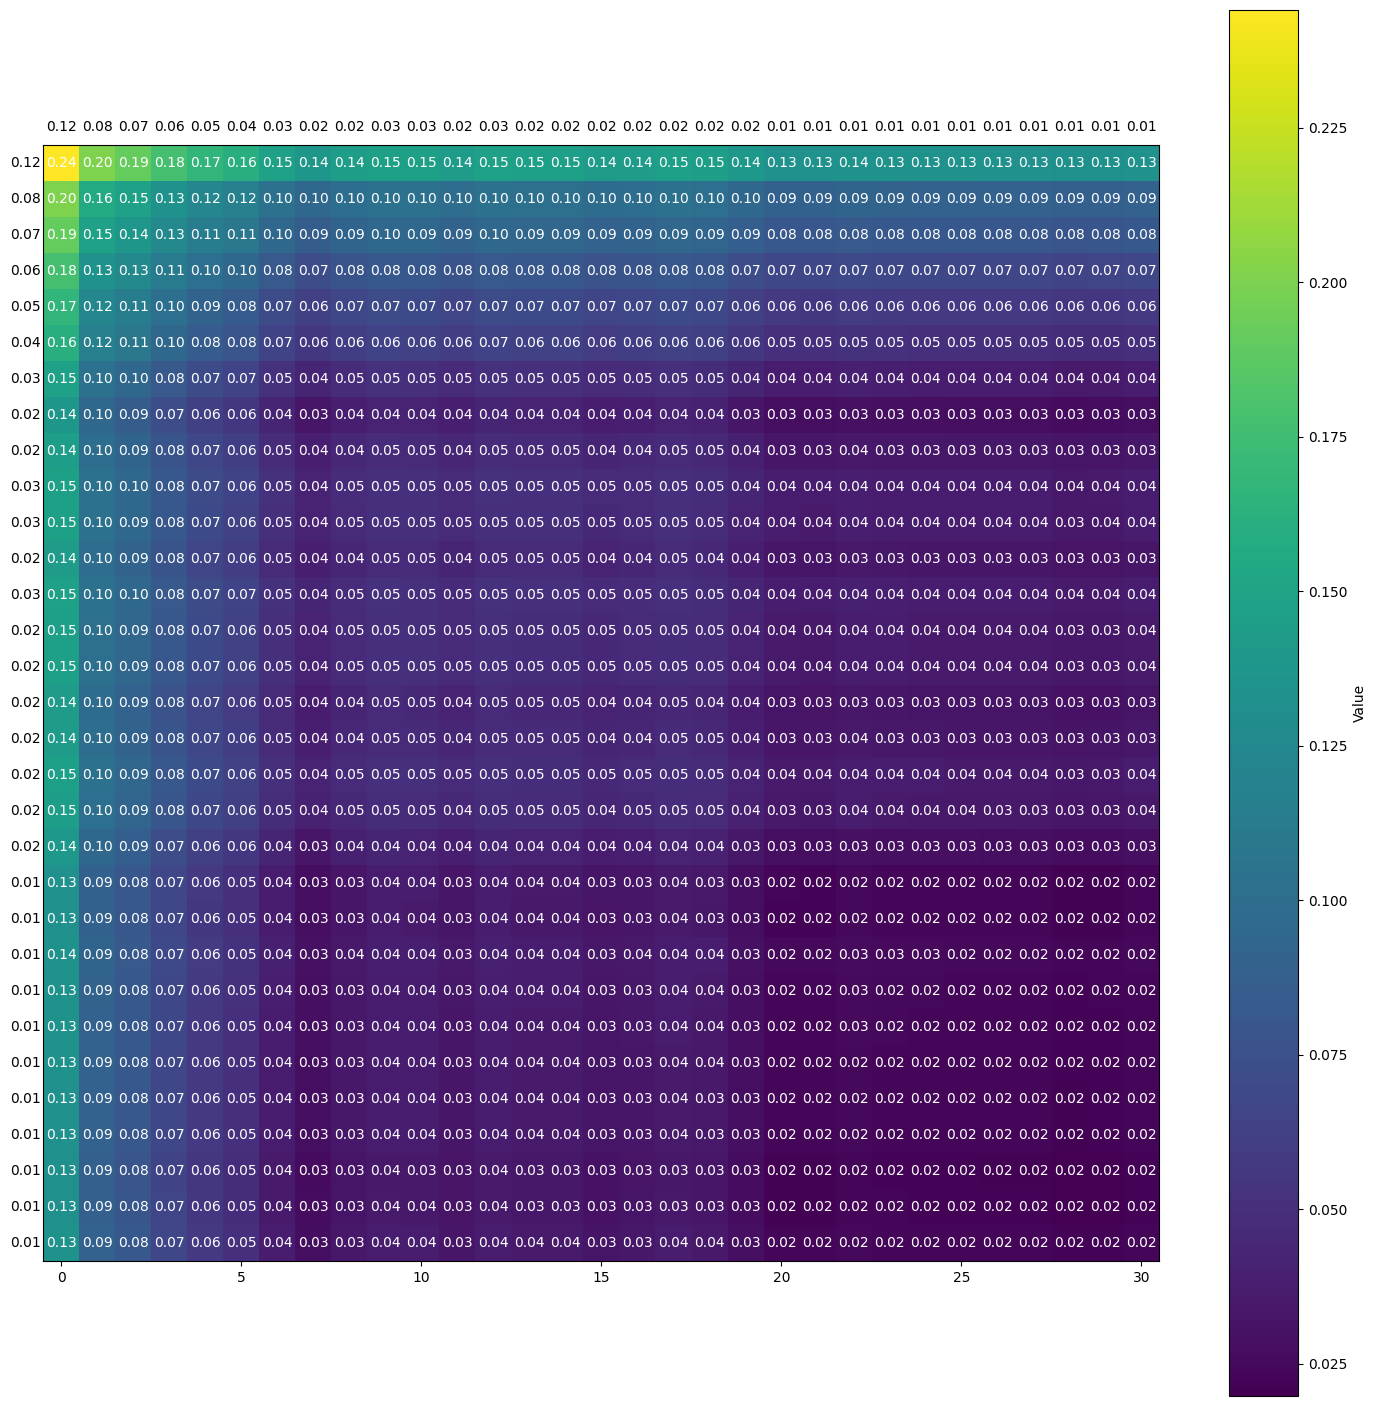

In [44]:
# 假设 unique_al 和 list4 已经定义并提供了数据
matric = np.zeros(961).reshape(31, 31)
for i in range(31):
    for j in range(31):
        temp = np.array(list4[1]).T
        matric[i][j] = unique_al(list4[1][i], temp[j])

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值

plt.gca().axes.get_yaxis().set_visible(False)

# 添加列标题显示
for j in range(matric.shape[1]):
    plt.text(j, -1, f"{list4[1][j]:.2f}", ha='center', va='center', color="black", fontsize=10)

for i in range(matric.shape[0]):
    plt.text(-1, i, f"{list4[1][i]:.2f}", ha='center', va='center', color="black", fontsize=10)

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('cifar1.png', dpi=600) 
plt.show()

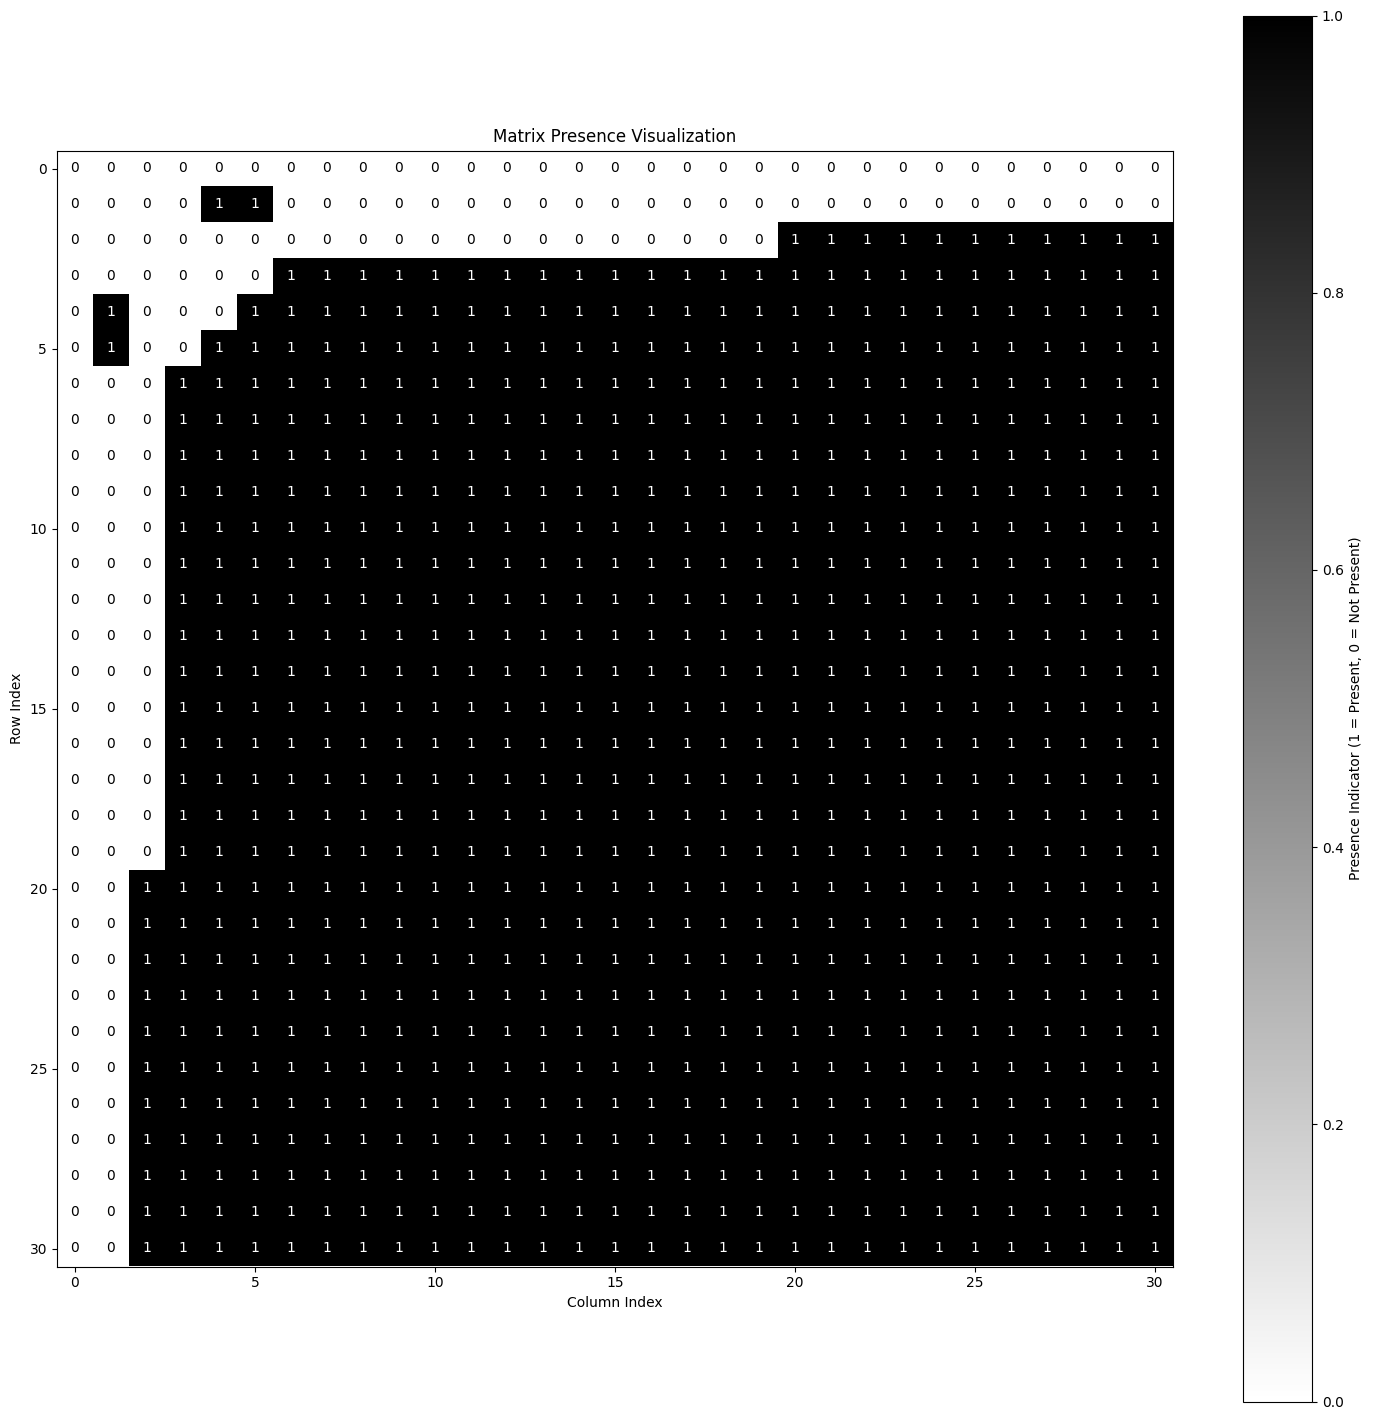

In [45]:
# 创建用于存储结果的矩阵
new_matrix = np.zeros_like(matric)

# 生成 list4 中只看小数点后两位的值集合
rounded_list4_values = {round(value, 2) for value in list4[1]}

# 检查 matric 中的值是否在 list4 的值集合中
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        if round(matric[i, j], 2) in rounded_list4_values:
            new_matrix[i, j] = 1  # 匹配成功则置 1

# 可视化新矩阵
plt.figure(figsize=(18, 18))
plt.imshow(new_matrix, cmap='binary', interpolation='nearest')
plt.colorbar(label="Presence Indicator (1 = Present, 0 = Not Present)")
plt.title("Matrix Presence Visualization")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加矩阵内数值显示
for i in range(new_matrix.shape[0]):
    for j in range(new_matrix.shape[1]):
        plt.text(j, i, f"{int(new_matrix[i, j])}", ha='center', va='center', color="white" if new_matrix[i, j] == 1 else "black")

plt.savefig('cifar10.png', dpi=600) 
plt.show()

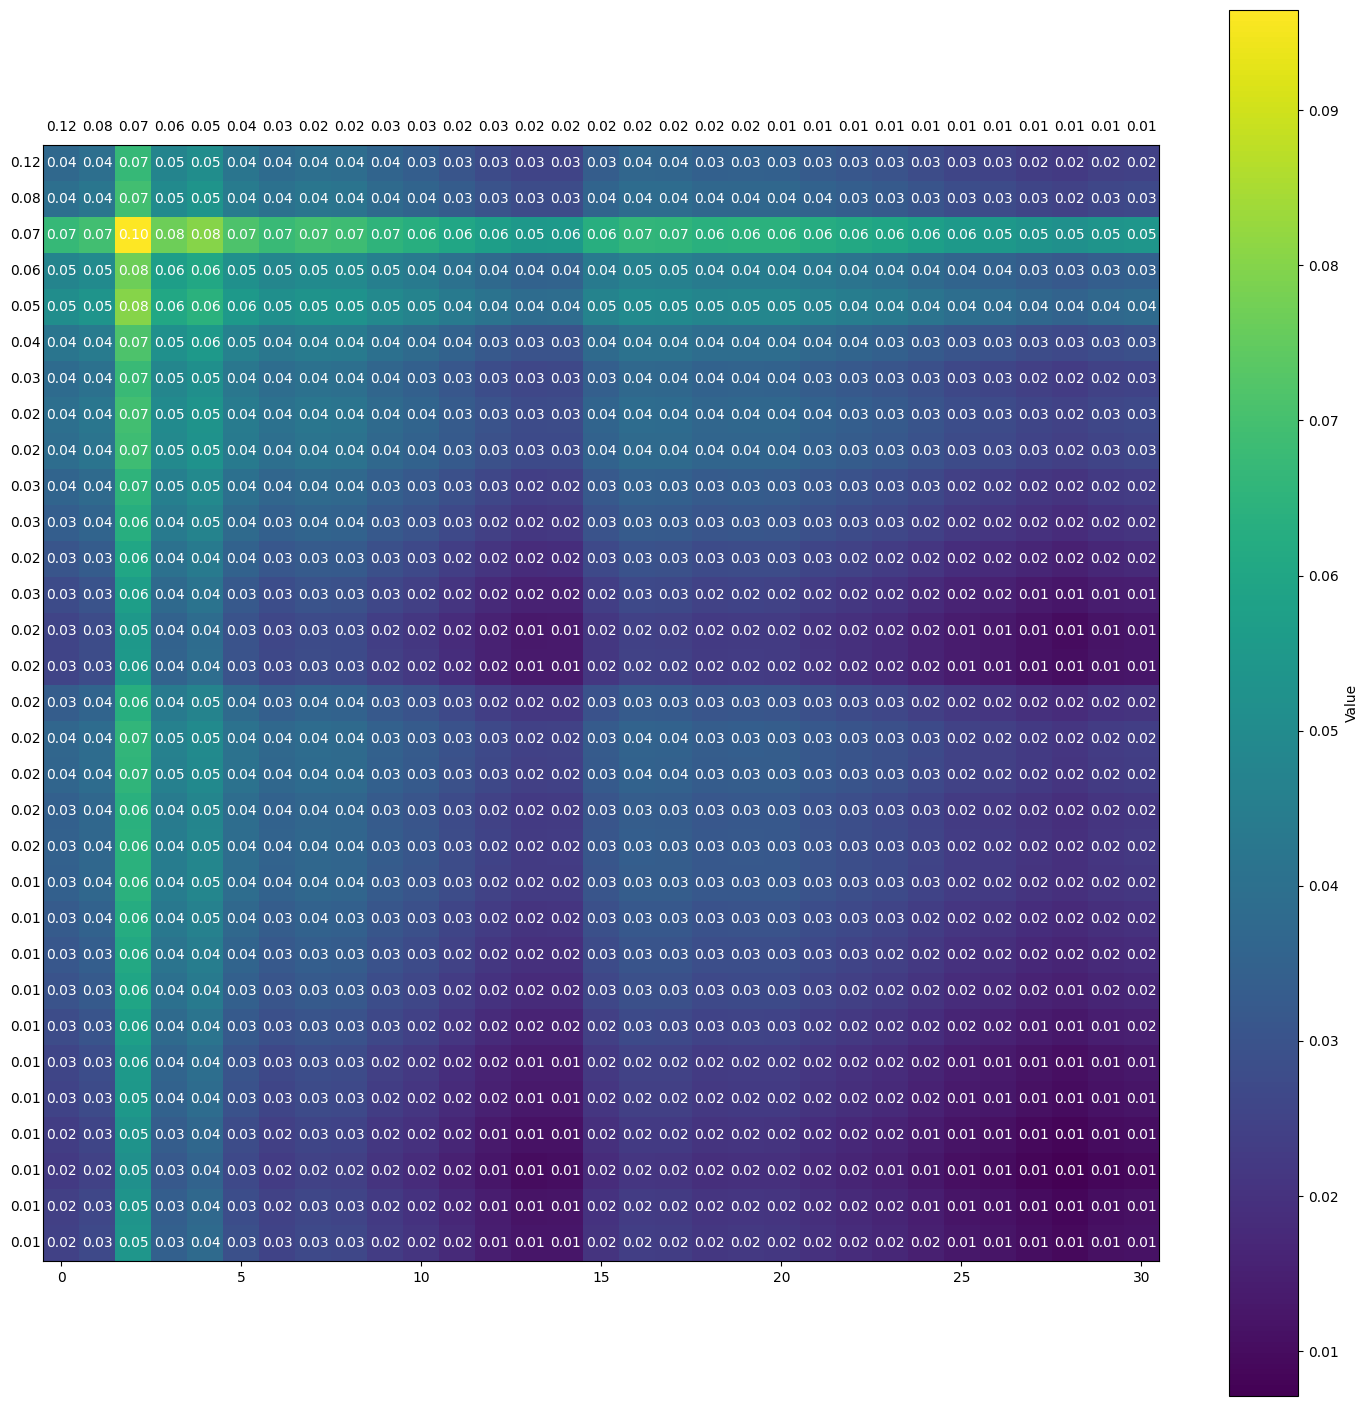

In [46]:
# 假设 unique_al 和 list4 已经定义并提供了数据
matric = np.zeros(961).reshape(31, 31)
for i in range(31):
    for j in range(31):
        temp = np.array(list4[2]).T
        matric[i][j] = unique_al(list4[2][i], temp[j])

# 可视化矩阵
plt.figure(figsize=(18, 18))
plt.imshow(matric, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Value")  # 添加颜色条来显示数值

plt.gca().axes.get_yaxis().set_visible(False)

# 添加列标题显示
for j in range(matric.shape[1]):
    plt.text(j, -1, f"{list4[1][j]:.2f}", ha='center', va='center', color="black", fontsize=10)

for i in range(matric.shape[0]):
    plt.text(-1, i, f"{list4[1][i]:.2f}", ha='center', va='center', color="black", fontsize=10)

# 添加数值显示
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        plt.text(j, i, f"{matric[i, j]:.2f}", ha='center', va='center', color="white")

plt.savefig('cifar2.png', dpi=600) 
plt.show()

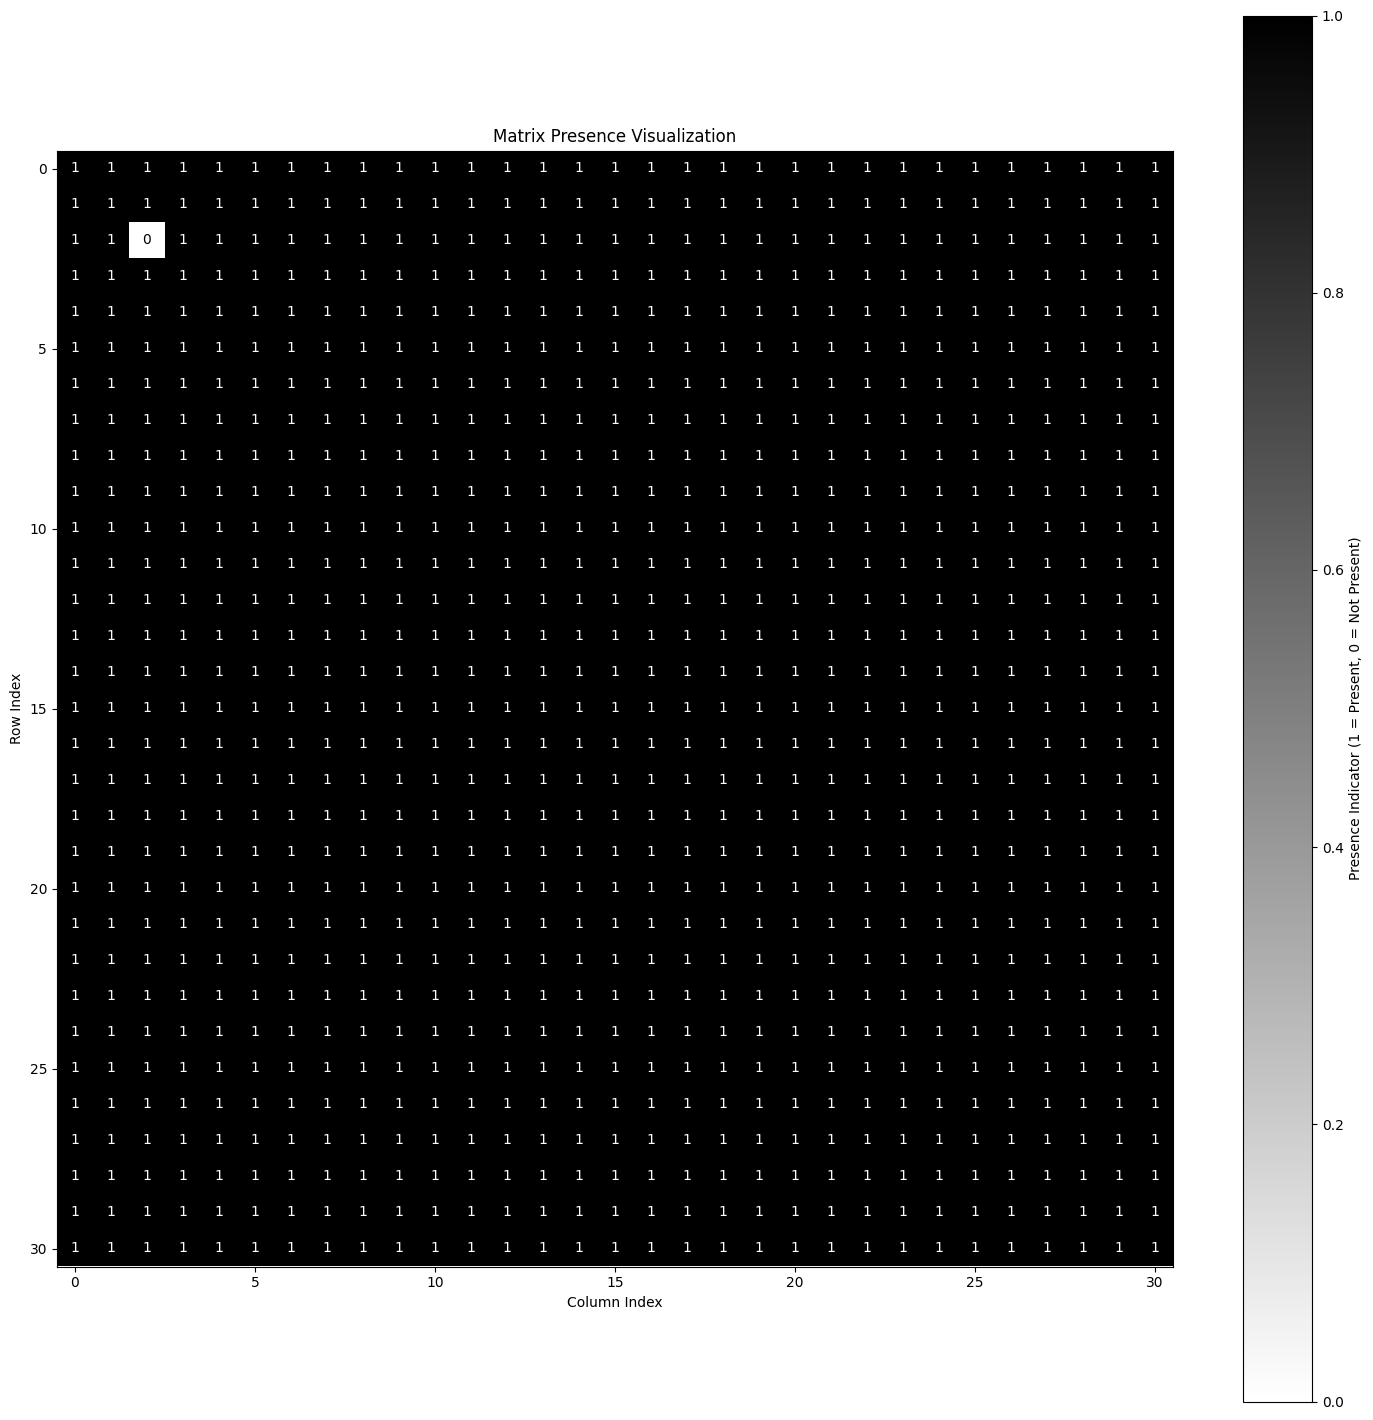

In [47]:
# 创建用于存储结果的矩阵
new_matrix = np.zeros_like(matric)

# 生成 list4 中只看小数点后两位的值集合
rounded_list4_values = {round(value, 2) for value in list4[1]}

# 检查 matric 中的值是否在 list4 的值集合中
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        if round(matric[i, j], 2) in rounded_list4_values:
            new_matrix[i, j] = 1  # 匹配成功则置 1

# 可视化新矩阵
plt.figure(figsize=(18, 18))
plt.imshow(new_matrix, cmap='binary', interpolation='nearest')
plt.colorbar(label="Presence Indicator (1 = Present, 0 = Not Present)")
plt.title("Matrix Presence Visualization")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加矩阵内数值显示
for i in range(new_matrix.shape[0]):
    for j in range(new_matrix.shape[1]):
        plt.text(j, i, f"{int(new_matrix[i, j])}", ha='center', va='center', color="white" if new_matrix[i, j] == 1 else "black")

plt.savefig('cifar10.png', dpi=600) 
plt.show()

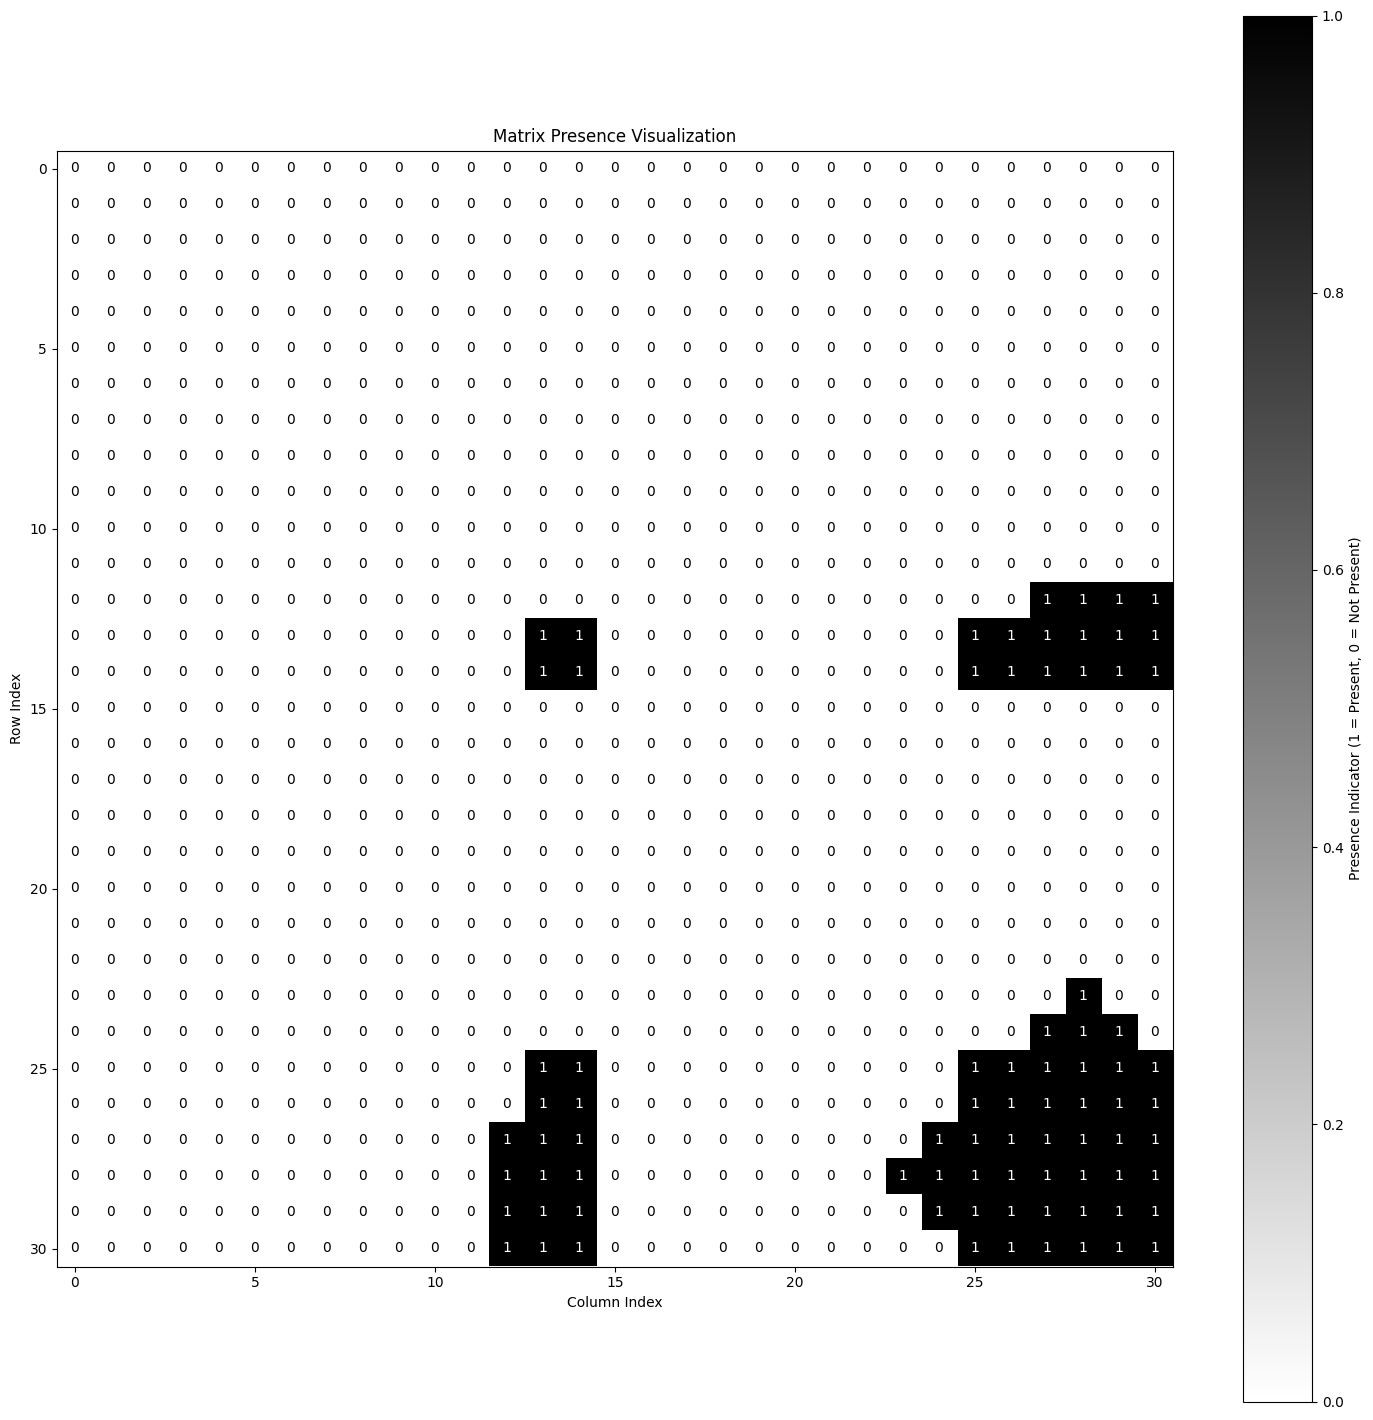

In [48]:
# 创建用于存储结果的矩阵
new_matrix = np.zeros_like(matric)

# 生成 list4 中只看小数点后两位的值集合
rounded_list4_values = {round(value, 3) for value in list4[1]}

# 检查 matric 中的值是否在 list4 的值集合中
for i in range(matric.shape[0]):
    for j in range(matric.shape[1]):
        if round(matric[i, j], 2) in rounded_list4_values:
            new_matrix[i, j] = 1  # 匹配成功则置 1

# 可视化新矩阵
plt.figure(figsize=(18, 18))
plt.imshow(new_matrix, cmap='binary', interpolation='nearest')
plt.colorbar(label="Presence Indicator (1 = Present, 0 = Not Present)")
plt.title("Matrix Presence Visualization")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# 添加矩阵内数值显示
for i in range(new_matrix.shape[0]):
    for j in range(new_matrix.shape[1]):
        plt.text(j, i, f"{int(new_matrix[i, j])}", ha='center', va='center', color="white" if new_matrix[i, j] == 1 else "black")

# plt.savefig('test.png', dpi=600) 
plt.show()